<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK26_W7_Mini_project__Kaggle_Regression_predicting_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문제 설명
'Country'
'Year'
'Status'
'Life expectancy '
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Hepatitis B'
'Measles '
' BMI '
'under-five deaths '
'Polio'
'Total expenditure'
'Diphtheria '
' HIV/AIDS'
'GDP'
'Population'
' thinness  1-19 years'
' thinness 5-9 years'
'Income composition of resources'
'Schooling'

1) Country : 나라명<br>
2) Year : 조사 연도 (2000 ~ 2015)<br>
3) Status : 국가 개발 정도<br>
4) Life expectancy : 기대 수명 (label_name으로 사용 예정)<br>
5) Adult Mortality : 성인 사망자수(15세 - 60세 사이 1000명 당 사망률)<br>
6) infant deaths : 신생아 사망자수(1000명 당)<br>
7) Alcohol : 인당 순수 알코올 소비량<br>
8) percentage expenditure : GDP 대비 의료비 지출(%)
<br>9) Hepatitis B : 1세 아동 B형 간염 예방 접종률(%)
<br>10) Measles : 1000명 당 홍역 감염 보고 수
<br>11) BMI : 국민 BMI 평균
<br>12) under-five deaths : 1000명 당 5세 이하 사망자 수
<br>13) Polio : 1세 아동 소아 마비 예방 접종률(%)
<br>14) Total expenditure : 총 정부 지출 대비 의료 정부 지출 비율(%)
<br>15) Diphtheria : 1세 아동 디프테리아 독소 및 백일해 예방 접종률(%)
<br>16) HIV/AIDS : 1000명 당 에이즈로 인한 사망자 수
<br>17) GDP : 인당 GDP (단위: USD)
<br>18) Population : 인구 수
<br>19) thinness 10-19 years : 10-19세 청소년 중 마른 비율(%)
<br>20) thinness 5-9 years : 5-9세 유아 중 마른 비율(%)
<br>21) Income composition of resources : 소득 대비 HDI(인간 개발 지수)
<br>22) Schooling : 학교 재학년수

# 2. 라이브러리, 데이터셋 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Codelion_weekly assignments/Life Expectancy Data.csv')
data.shape

(2938, 22)

데이터 중 life expectancy가 없는 10개 데이터는 버리고 가기로, 미팅 결과 합의<br>
따라서 데이터 탐색 전에 미리 삭제해주고 시작하겠음

In [ ]:
delete_index = data[data['Life expectancy '].isnull()].index.tolist()
data = data.drop(delete_index, axis = 0)
data.shape

(2928, 22)

In [ ]:
data['Life expectancy '].isnull().sum()

0

# 3. 데이터 기초정보 확인

In [ ]:
original_cols = data.columns.values.tolist()
print(original_cols)

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
mycols = ['country', 'year', 'nationstatus', 'lifeexpectancy', 'adult_mortality','infant_deaths',
          'alcoholconsumption', 'p_expenditure_pergdp', 'hepb_vac_rates','measles', 'bmi', 
          'under_five_deaths', 'polio', 'p_expenditure',
          'diphtheria', 'under_four_hiv/aids', 'gdp', 'population',
          'thinness_10to19', 'thinness_5to9', 'hd_index_income', 'schooling_years']

In [ ]:
data.shape

(2928, 22)

In [ ]:
data.columns = mycols
display(data.head(3))
display(data.sample(3))

country  year nationstatus  lifeexpectancy  adult_mortality  \
0  Afghanistan  2015   Developing            65.0            263.0   
1  Afghanistan  2014   Developing            59.9            271.0   
2  Afghanistan  2013   Developing            59.9            268.0   

   infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
0             62                0.01             71.279624            65.0   
1             64                0.01             73.523582            62.0   
2             66                0.01             73.219243            64.0   

   measles  ...  polio  p_expenditure  diphtheria  under_four_hiv/aids  \
0     1154  ...    6.0           8.16        65.0                  0.1   
1      492  ...   58.0           8.18        62.0                  0.1   
2      430  ...   62.0           8.13        64.0                  0.1   

          gdp  population  thinness_10to19  thinness_5to9  hd_index_income  \
0  584.259210  33736494.0             17.2           17.3            0.479   
1  612.696514    327582.0             17.5           17.5            0.476   
2  631.744976  31731688.0             17.7           17.7            0.470   

   schooling_years  
0             10.1  
1             10.0  
2              9.9  

[3 rows x 22 columns]

country  year nationstatus  lifeexpectancy  adult_mortality  \
2238  Saudi Arabia  2010   Developing            73.7             94.0   
2438         Spain  2002    Developed            79.5             83.0   
1496       Liberia  2009   Developing            59.2            277.0   

      infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
2238              8                0.09           1197.946328            98.0   
2438              2               12.26            228.354302            82.0   
1496             10                3.75              5.592170            64.0   

      measles  ...  polio  p_expenditure  diphtheria  under_four_hiv/aids  \
2238      334  ...   98.0           3.49        98.0                  0.1   
2438       67  ...   98.0           7.25        98.0                  0.1   
1496        6  ...   84.0          14.39        81.0                  2.1   

               gdp  population  thinness_10to19  thinness_5to9  \
2238  19259.587260         NaN              7.3            7.4   
2438   1719.535410  41431558.0              0.6            0.5   
1496     33.667491   3811528.0              7.6            7.4   

      hd_index_income  schooling_years  
2238            0.792             13.3  
2438            0.828             15.7  
1496            0.400              9.7  

[3 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2928 non-null   object 
 1   year                  2928 non-null   int64  
 2   nationstatus          2928 non-null   object 
 3   lifeexpectancy        2928 non-null   float64
 4   adult_mortality       2928 non-null   float64
 5   infant_deaths         2928 non-null   int64  
 6   alcoholconsumption    2735 non-null   float64
 7   p_expenditure_pergdp  2928 non-null   float64
 8   hepb_vac_rates        2375 non-null   float64
 9   measles               2928 non-null   int64  
 10  bmi                   2896 non-null   float64
 11  under_five_deaths     2928 non-null   int64  
 12  polio                 2909 non-null   float64
 13  p_expenditure         2702 non-null   float64
 14  diphtheria            2909 non-null   float64
 15  under_four_hiv/aids  

국가명 등이 있어서 그런가? 데이터 shape에 비해 메모리 사용량이 상당히 큰 것 같음<br>
downcast 써보면 어떨까?<br>

|    | Data type   | Description                                                          |
|---:|:------------|:---------------------------------------------------------------------|
|  0 | bool        | Boolean (True or False) stored as a byte                             |
|  1 | int         | Platform integer (normally either int32 or int64)                    |
|  2 | int8        | Byte (-128 to 127)                                                   |
|  3 | int16       | Integer (-32768 to 32767)                                            |
|  4 | int32       | Integer (-2147483648 to 2147483647)                                  |
|  5 | int64       | Integer (9223372036854775808 to 9223372036854775807)                 |
|  6 | uint8       | Unsigned integer (0 to 255)                                          |
|  7 | uint16      | Unsigned integer (0 to 65535)                                        |
|  8 | uint32      | Unsigned integer (0 to 4294967295)                                   |
|  9 | uint64      | Unsigned integer (0 to 18446744073709551615)                         |
| 10 | float       | Shorthand for float64.                                               |
| 11 | float16     | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa    |
| 12 | float32     | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa  |
| 13 | float64     | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa |
| 14 | complex     | Shorthand for complex128.                                            |
| 15 | complex64   | Complex number, represented by two 32-bit floats                     |
| 16 | complex128  | Complex number, represented by two 64-bit floats                     |

In [ ]:
icols = data.select_dtypes('integer').columns.tolist()
fcols = data.select_dtypes('float').columns.tolist()

In [ ]:
display(data[icols].min())
print("-"*50)
display(data[fcols].min())

year                 2000
infant_deaths           0
measles                 0
under_five_deaths       0
dtype: int64

--------------------------------------------------


lifeexpectancy          36.30000
adult_mortality          1.00000
alcoholconsumption       0.01000
p_expenditure_pergdp     0.00000
hepb_vac_rates           1.00000
bmi                      1.00000
polio                    3.00000
p_expenditure            0.37000
diphtheria               2.00000
under_four_hiv/aids      0.10000
gdp                      1.68135
population              34.00000
thinness_10to19          0.10000
thinness_5to9            0.10000
hd_index_income          0.00000
schooling_years          0.00000
dtype: float64

In [ ]:
# 과학적 표기법 대신 소수점 5자리까지 나타낸다.
pd.options.display.float_format = '{:.5f}'.format

display(data[icols].max())
print("-"*50)
display(data[fcols].max())

year                   2015
infant_deaths          1800
measles              212183
under_five_deaths      2500
dtype: int64

--------------------------------------------------


lifeexpectancy                 89.00000
adult_mortality               723.00000
alcoholconsumption             17.87000
p_expenditure_pergdp        19479.91161
hepb_vac_rates                 99.00000
bmi                            77.60000
polio                          99.00000
p_expenditure                  17.60000
diphtheria                     99.00000
under_four_hiv/aids            50.60000
gdp                        119172.74180
population             1293859294.00000
thinness_10to19                27.70000
thinness_5to9                  28.60000
hd_index_income                 0.94800
schooling_years                20.70000
dtype: float64

In [ ]:
data[icols] = data[icols].apply(lambda int_features : pd.to_numeric(int_features, downcast = 'unsigned'))
data[fcols] = data[fcols].apply(lambda float_features : pd.to_numeric(float_features, downcast = 'float'))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2928 non-null   object 
 1   year                  2928 non-null   uint16 
 2   nationstatus          2928 non-null   object 
 3   lifeexpectancy        2928 non-null   float32
 4   adult_mortality       2928 non-null   float32
 5   infant_deaths         2928 non-null   uint16 
 6   alcoholconsumption    2735 non-null   float32
 7   p_expenditure_pergdp  2928 non-null   float32
 8   hepb_vac_rates        2375 non-null   float32
 9   measles               2928 non-null   uint32 
 10  bmi                   2896 non-null   float32
 11  under_five_deaths     2928 non-null   uint16 
 12  polio                 2909 non-null   float32
 13  p_expenditure         2702 non-null   float32
 14  diphtheria            2909 non-null   float32
 15  under_four_hiv/aids  

downcast 이전 <br>
dtypes: float64(16), int64(4), object(2)
<br>memory usage: 526.1+ KB
<br>
<br>downcast 이후<br>
dtypes: float32(16), object(2), uint16(3), uint32(1)
<br>memory usage: 280.2+ KB

기술통계 확인해줌

In [ ]:
display(data.describe().loc[:,'year':'under_five_deaths'])
display(data.describe().loc[:,'polio':])


year  lifeexpectancy  adult_mortality  infant_deaths  \
count 2928.00000      2928.00000       2928.00000     2928.00000   
mean  2007.50000        69.22493        164.79645       30.40745   
std      4.61056         9.52387        124.29208      118.11445   
min   2000.00000        36.30000          1.00000        0.00000   
25%   2003.75000        63.10000         74.00000        0.00000   
50%   2007.50000        72.10000        144.00000        3.00000   
75%   2011.25000        75.70000        228.00000       22.00000   
max   2015.00000        89.00000        723.00000     1800.00000   

       alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates      measles  \
count          2735.00000            2928.00000      2375.00000   2928.00000   
mean              4.61486             740.32123        80.96084   2427.85587   
std               4.05075            1990.93054        25.01834  11485.97094   
min               0.01000               0.00000         1.00000      0.00000   
25%               0.90500               4.85396        77.00000      0.00000   
50%               3.77000              65.61145        92.00000     17.00000   
75%               7.71500             442.61431        97.00000    362.25000   
max              17.87000           19479.91211        99.00000 212183.00000   

             bmi  under_five_deaths  
count 2896.00000         2928.00000  
mean    38.23539           42.17930  
std     19.95959          160.70055  
min      1.00000            0.00000  
25%     19.30000            0.00000  
50%     43.35000            4.00000  
75%     56.10000           28.00000  
max     77.60000         2500.00000

polio  p_expenditure  diphtheria  under_four_hiv/aids          gdp  \
count 2909.00000     2702.00000  2909.00000           2928.00000   2485.00000   
mean    82.54830        5.93016    82.32142              1.74771   7494.21094   
std     23.41667        2.48327    23.70664              5.08554  14282.25098   
min      3.00000        0.37000     2.00000              0.10000      1.68135   
25%     78.00000        4.26000    78.00000              0.10000    463.85263   
50%     93.00000        5.75000    93.00000              0.10000   1764.97388   
75%     97.00000        7.49000    97.00000              0.80000   5932.89990   
max     99.00000       17.60000    99.00000             50.60000 119172.74219   

            population  thinness_10to19  thinness_5to9  hd_index_income  \
count       2284.00000       2896.00000     2896.00000       2768.00000   
mean    12764542.00000          4.85062        4.88142          0.62742   
std     61037648.00000          4.42083        4.50961          0.21098   
min           34.00000          0.10000        0.10000          0.00000   
25%       196673.75000          1.60000        1.57500          0.49300   
50%      1391756.50000          3.30000        3.40000          0.67700   
75%      7426745.50000          7.20000        7.20000          0.77925   
max   1293859328.00000         27.70000       28.60000          0.94800   

       schooling_years  
count       2768.00000  
mean          11.99964  
std            3.34644  
min            0.00000  
25%           10.10000  
50%           12.30000  
75%           14.30000  
max           20.70000

위 기술통계로부터 얻을 수 있는 포인트는 세 가지 정도가 있음. <br>
1. 이상치에 가까운, 편향된 분포를 갖는 features 도출  <br>
    - 0 ~ 25% - hepb_vac_rates / polio / diphtheria / schooling years 
    - 75% ~ 100% : adult_mortality / infant_deaths / p_expenditure_pergdp / measles / under_five_deaths / gdp / population 
    <br>
2.  p_expenditure_pergdp : GDP 대비 의료비 지출(%) - 퍼센트 비율인데 75% = 441.534144....? 물론 예상치 못한 이유로 GDP 이상으로 지출을 할 수도 있겠지, 라고 생각을 해보긴 했는데. 그래도 400%, 19500%는 뭔가 에러 혹은 이상치 영역이 맞는 듯<br>
3. measles : 홍역, 인구 1000명당 보고된 환자 수 - 홍역은 재발하는 병이 아니라는데, 1000 이상의 값이 가지는 의미는? <br>
[삼성서울병원 홍역 질병 정보](http://www.samsunghospital.com/home/healthInfo/content/contenView.do?CONT_SRC=CMS&CONT_SRC_ID=09a4727a8000f380&CONT_CLS_CD=001020001013&CONT_ID=1639)


In [ ]:
data.describe(include = ['O'])

country nationstatus
count          2928         2928
unique          183            2
top     Afghanistan   Developing
freq             16         2416

데이터 유형(연속형/범주형) 및 분포 확인해줌

In [ ]:
data.nunique()

country                  183
year                      16
nationstatus               2
lifeexpectancy           362
adult_mortality          425
infant_deaths            209
alcoholconsumption      1076
p_expenditure_pergdp    2323
hepb_vac_rates            87
measles                  958
bmi                      602
under_five_deaths        252
polio                     73
p_expenditure            816
diphtheria                81
under_four_hiv/aids      200
gdp                     2485
population              2277
thinness_10to19          200
thinness_5to9            207
hd_index_income          625
schooling_years          173
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bae582510>,
      dtype=object)

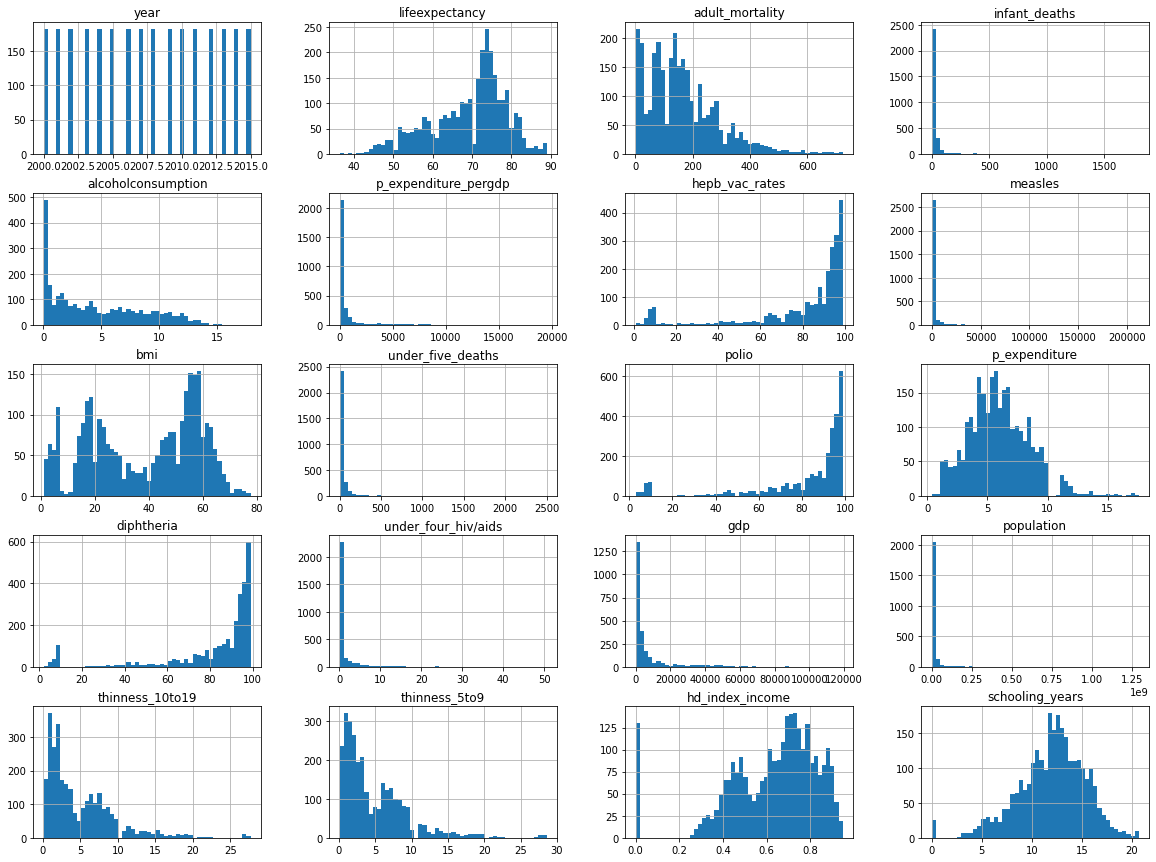

In [ ]:
data.hist(figsize = (20,15), bins = 50)

중복값 / 결측치

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

country                   0
year                      0
nationstatus              0
lifeexpectancy            0
adult_mortality           0
infant_deaths             0
alcoholconsumption      193
p_expenditure_pergdp      0
hepb_vac_rates          553
measles                   0
bmi                      32
under_five_deaths         0
polio                    19
p_expenditure           226
diphtheria               19
under_four_hiv/aids       0
gdp                     443
population              644
thinness_10to19          32
thinness_5to9            32
hd_index_income         160
schooling_years         160
dtype: int64

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

alcoholconsumption    193
hepb_vac_rates        553
bmi                    32
polio                  19
p_expenditure         226
diphtheria             19
gdp                   443
population            644
thinness_10to19        32
thinness_5to9          32
hd_index_income       160
schooling_years       160
dtype: int64

바로 결측치 처리를 해주기보다는, Part4-5에서 데이터EDA, Feature engineering을 하며 필요없는 데이터는 버리고 중요한 feature에 대해서만 결측치 처리를 해주기로 함!

# 4. EDA, 전처리 및 시각화

## Case1. 편향된 분포 그대로 사용할 경우


### 상관관계 heatmap (결측치 등 전처리 전) <br> 
[heatmap - triu(mask) 관련, np.ones* 함수 정리](https://jimmy-ai.tistory.com/84)

In [ ]:
corr = data.corr()

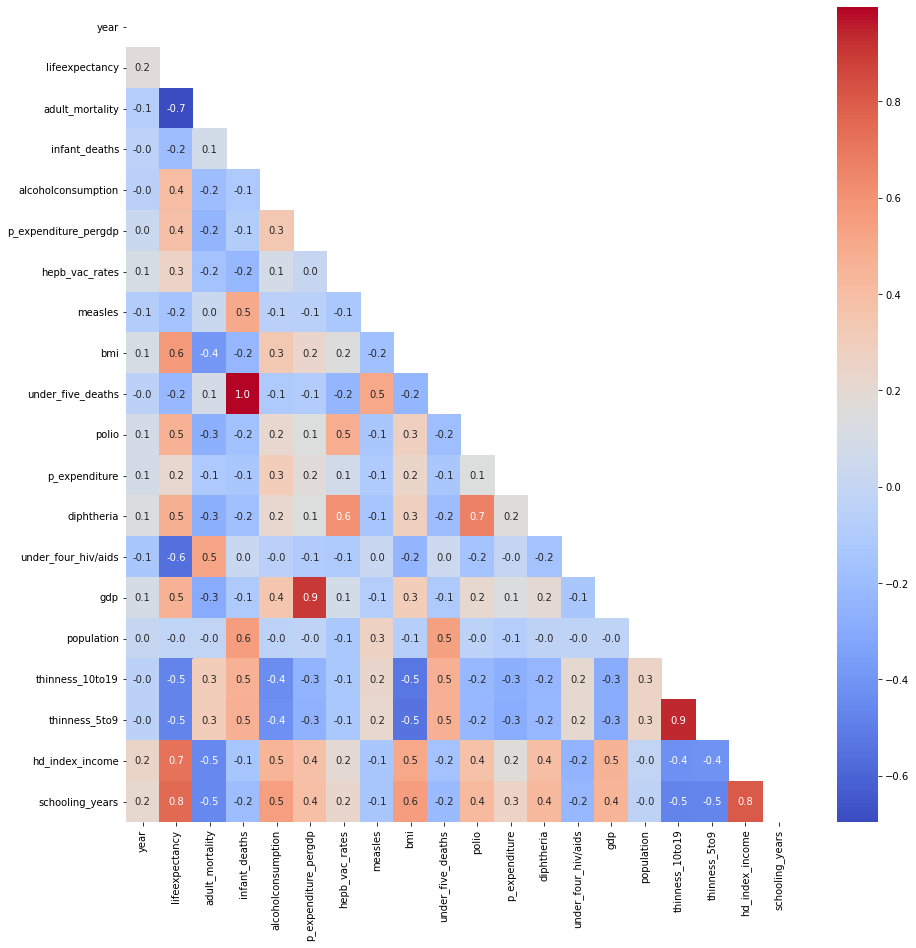

In [ ]:
# heatmap
plt.figure(figsize = (15,15))
mask_triu = np.triu(np.ones_like(corr, dtype = bool))
_ = sns.heatmap(corr, mask = mask_triu,
                cmap = 'coolwarm',
                annot = True, fmt = ',.1f', )

기대수명 lifeexpectancy와 다른 변수 간 관계를 중심으로 히트맵 그래프를 살펴보았을 떄, <br>
1. 소아보다는 성인 관련된 feature들이 기대수명과 더 함께 움직이는 경향<br>
    - 소아 : infant_deaths, under_five_deaths <br>(이 때 polio, thinness_5to9은 생존에 관한 컬럼으로, 향후 성인들의 건강 status와 연결되는 부분이 많으므로, 상대적으로 많은 상관관계를 갖는 걸로 보임)<br>(under_four_hiv/aids 또한, 그 나이 대의 아이들이 에이즈에 걸리는 건 부모의 영향이 크다고 봄. 따라서 기대수명과 음의 상관관계를 갖는 게 이해감)<br>
2. adult_mortality : 1000명 당 사망자 수 증가 시, 그 나이가 기대수명에 영향을 미치므로 중요한 feature로 작용할 것 <br>
3. 건강상태에 영향을 미치는 백신 접종률 등의 feature는 상관 계수가 높음<br>
    - 백신 접종 : hepb_vac_rates, polio, diphteria
    - 질병 확진 이력 : measles<br>(홍역이 상관관계가 낮은 건, 위 기술통계 파트에서 확인한 이상치 (75% 이상 구간에 대한) 영향이 아닐까 예상<br>
    - 의사들이 좋아하는 feature : alcoholconsumption, bmi<br>
4. 사회/경제적 요소들 : 일부 중복이 존재하는 듯
    - p_expenditure_pergdp : gdp 대비 보건 예산 지출 비용 비율
    - p_expenditure : 정부 지출 대비 보건 예산 지출 비용 비율
    - gdp -> 왜 경제 관련 세 개 지표 중, 얘가 가장 상관 관계가 클까?
    - population
    - schooling_years
    - hd_index_income : 얘는 근데 산출 항목에 기대수명이 포함되어 있음



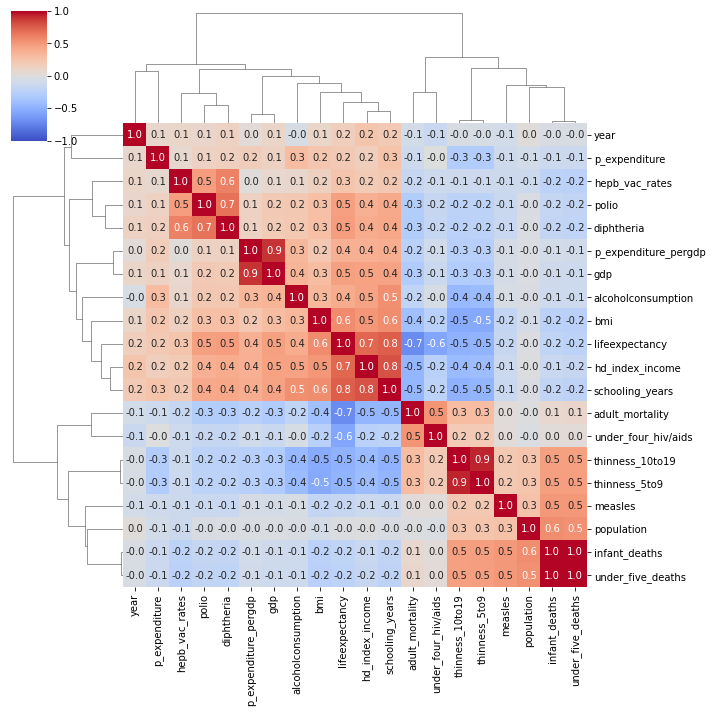

In [ ]:
# clustermap : heatmap처럼 상관 관계를 색깔로 나타내며, 행열 별로 비슷한 항목들을 묶어줌
_ = sns.clustermap(data = corr,
                   annot = True, fmt = ',.1f',
                   cmap = 'coolwarm', 
                   vmin = -1, vmax = 1)

위 clustering 결과를 보면, heatmap을 보고 예상했던 것처럼<br>
- adult_mortality와 under_four_hiv/aids가 비슷한 그룹으로 분류되어 있고
- hepb_vac_rates, polio, diphtheria 등 질병 관련 feature가 비슷한 그룹으로 묶여있는 걸 확인할 수 있음

### 결측치 처리

#### hepb_vac_rates

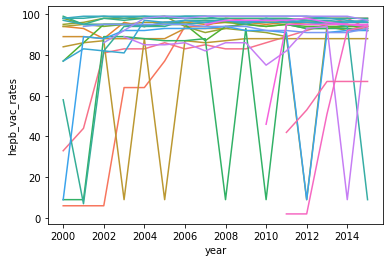

In [ ]:
# 국가 별로 hepb_vac_rates 차이가 많이 있을까?
foo = data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates']>0), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

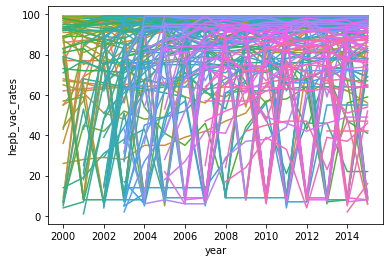

In [ ]:
foo = data.loc[(data['nationstatus']=='Developing') & (data['hepb_vac_rates'].notnull()), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

위 그래프를 보면, 이미 상당한 백신 접종율을 가지고 있던 나라들이 이상한 flunctuation을 갖는 걸 알 수 있음. <br>이건 실제로 백신 접종률이 매우 낮기 때문보다, 데이터 수집 과정에서 어떤 오류에 의한 것으로 판단됨<br>
따라서 선진국/개발도상국으로 나눠서 median값으로 결측치 -> 이상치 순으로 제거해주겠음

In [ ]:
# 데이터 있는 애들 - nationstatus 별 기술통계
h_temp = data.loc[ (data['hepb_vac_rates']>0), ['nationstatus','year','hepb_vac_rates']]
df_median = pd.crosstab(index = h_temp.year, columns = h_temp.nationstatus, values = h_temp.hepb_vac_rates, aggfunc = 'median')
df_median.head(3)

nationstatus  Developed  Developing
year                               
2000           89.00000    89.00000
2001           91.00000    87.00000
2002           89.00000    88.00000

In [ ]:
# 결측치부터 채워주기 - median
data.loc[ (data['nationstatus']=='Developed') & (data['hepb_vac_rates'].isnull()), 'hepb_vac_rates'] = data.loc[ (data['nationstatus']=='Developed') & 
                                                                                                                (data['hepb_vac_rates'].isnull()), 'year'].apply(lambda x : df_median.loc[x, 'Developed'])
data.loc[ (data['nationstatus']=='Developing') & (data['hepb_vac_rates'].isnull()), 'hepb_vac_rates'] = data.loc[ (data['nationstatus']=='Developing') & 
                                                                                                                (data['hepb_vac_rates'].isnull()), 'year'].apply(lambda x : df_median.loc[x, 'Developing'])
data['hepb_vac_rates'].isnull().sum()

0

In [ ]:
# 각 연도, nationstatus 별 mean보다 낮은 수치는 이상치로 간주 > mean 값으로 대체
df_mean = pd.crosstab(index = h_temp.year, columns = h_temp.nationstatus, values = h_temp.hepb_vac_rates, aggfunc = 'mean')
mean_dev_ed = df_mean['Developed'].mean() # 87.7343
mean_dev_ing = df_mean['Developing'].mean() # 79.140045

In [ ]:
# 이상치 제거
data.loc[ (data['nationstatus']=='Developed') & (data['hepb_vac_rates'] < mean_dev_ed), 'hepb_vac_rates'] = df_median['Developed'].mean()
data.loc[ (data['nationstatus']=='Developing') & (data['hepb_vac_rates'] < mean_dev_ing), 'hepb_vac_rates'] = df_median['Developing'].mean()


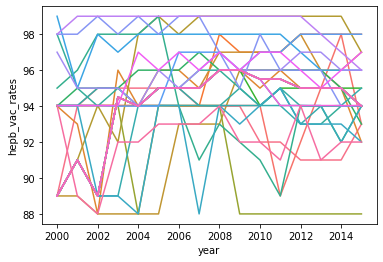

In [ ]:
# 선진국 - 분포 재확인
foo = data.loc[(data['nationstatus']=='Developed'), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

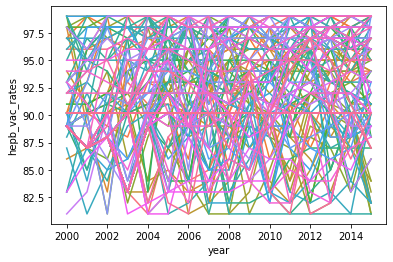

In [ ]:
# 개발도상국 - 분포 재확인
foo = data.loc[(data['nationstatus']=='Developing'), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

In [ ]:
# 결측 데이터 - nationstatus 별 기술통계
data.groupby('nationstatus')['hepb_vac_rates'].describe()

count     mean     std      min      25%      50%      75%  \
nationstatus                                                                   
Developed     512.00000 94.46680 2.62085 88.00000 94.00000 95.00000 96.00000   
Developing   2416.00000 91.73019 4.54851 81.00000 89.00000 90.18750 96.00000   

                  max  
nationstatus           
Developed    99.00000  
Developing   99.00000

#### polio /diphteria

In [ ]:
data[['nationstatus', 'polio', 'diphtheria', 'year']].describe()

polio  diphtheria       year
count 2909.00000  2909.00000 2928.00000
mean    82.54830    82.32142 2007.50000
std     23.41667    23.70664    4.61056
min      3.00000     2.00000 2000.00000
25%     78.00000    78.00000 2003.75000
50%     93.00000    93.00000 2007.50000
75%     97.00000    97.00000 2011.25000
max     99.00000    99.00000 2015.00000

In [ ]:
data.loc[data['polio'].isnull(), ['nationstatus', 'polio', 'diphtheria', 'country', 'year']]

nationstatus  polio  diphtheria      country  year
1742   Developing    NaN         NaN   Montenegro  2005
1743   Developing    NaN         NaN   Montenegro  2004
1744   Developing    NaN         NaN   Montenegro  2003
1745   Developing    NaN         NaN   Montenegro  2002
1746   Developing    NaN         NaN   Montenegro  2001
1747   Developing    NaN         NaN   Montenegro  2000
2414   Developing    NaN         NaN  South Sudan  2010
2415   Developing    NaN         NaN  South Sudan  2009
2416   Developing    NaN         NaN  South Sudan  2008
2417   Developing    NaN         NaN  South Sudan  2007
2418   Developing    NaN         NaN  South Sudan  2006
2419   Developing    NaN         NaN  South Sudan  2005
2420   Developing    NaN         NaN  South Sudan  2004
2421   Developing    NaN         NaN  South Sudan  2003
2422   Developing    NaN         NaN  South Sudan  2002
2423   Developing    NaN         NaN  South Sudan  2001
2424   Developing    NaN         NaN  South Sudan  2000
2615   Developing    NaN         NaN  Timor-Leste  2001
2616   Developing    NaN         NaN  Timor-Leste  2000

In [ ]:
# 데이터가 소수고, 추세를 파악하기 힘드므로 임의로 값을 지정해서 넣어줌 :)....:).....ㅎ...
data.loc[(data['country']=='Montenegro')& (data['year'].isin([2000, 2001,2002,2003,2004,2005,2006])), ['polio', 'diphtheria']] = 89.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2000, 2001,2002,2003,2004,2005])), 'polio'] = 55.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2006,2007,2008,2009,2010,2013])), 'polio'] = 61.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2000, 2001,2002,2003,2004,2005])), 'diphtheria'] = 41.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2006,2007,2008,2009,2010,2013])), 'diphtheria'] = 46.00000
data.loc[(data['country']=='Timor-Leste')& (data['year'].isin([2007])), ['polio', 'diphtheria']] = 70.00000
data.loc[(data['country']=='Timor-Leste')& (data['year'].isin([2000, 2001,2002])), 'polio'] = 51.00000
data.loc[(data['country']=='Timor-Leste')& (data['year'].isin([2000,2001,2002])), 'diphtheria'] = 52.00000


In [ ]:
data[['polio', 'diphtheria']].isnull().sum()

polio         0
diphtheria    0
dtype: int64

#### schooling_years / hd_index_income

In [ ]:
data.loc[data['schooling_years'].isnull(), ['schooling_years', 'hd_index_income']].isnull().sum()

schooling_years    160
hd_index_income    160
dtype: int64

In [ ]:
# data.loc[data['schooling_years'].isnull(), ['year', 'country', 'nationstatus', 'schooling_years', 'hd_index_income']]
list_null_country = data.loc[data['schooling_years'].isnull(), 'country'].unique().tolist()
len(list_null_country)

10

얘네도 전년도 데이터가 누락됐네? <br>
위 clustermap에 따르면, hd_index_income, schooling_years가 가장 밀접한 연관을 갖는 feature는 이 두가지임.
- lifeexpectancy
- bmi <br>
그렇지만 아래에서 기대수명과 달리 bmi는 20%-80% 수준을 오가는, 이상 그래프를 보임<br>
따라서 기대수명 (그리고 필요하다면 2015년 bmi 데이터를) 기준으로 추정해봄 

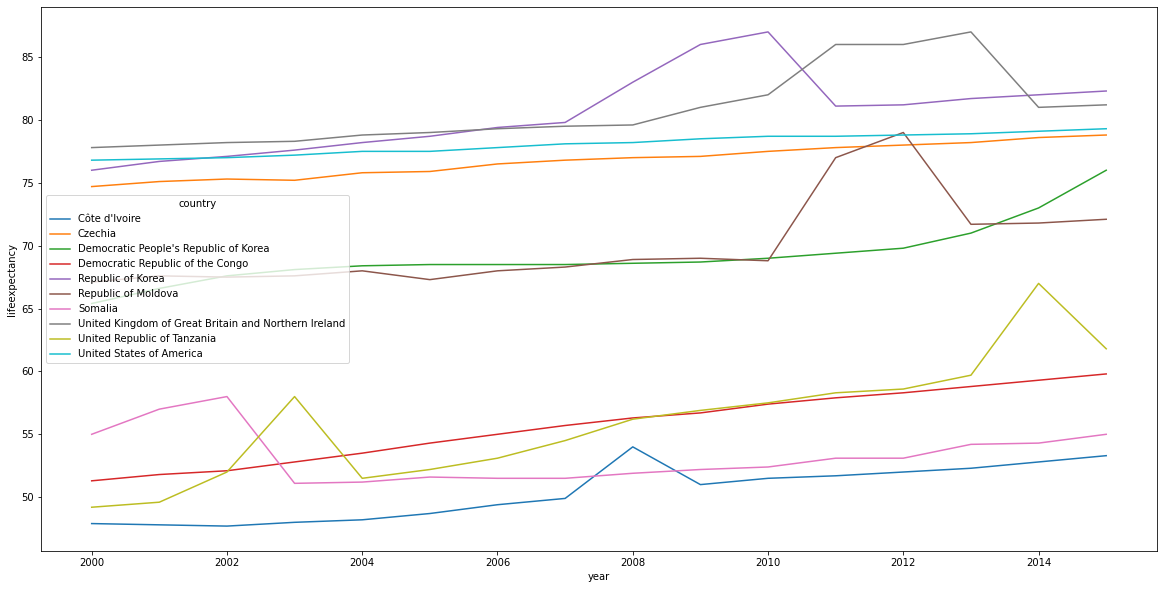

In [ ]:
foo = data.loc[data['country'].isin(list_null_country), ['year', 'country', 'lifeexpectancy', 'bmi']]
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = foo, x = 'year', y = 'lifeexpectancy', hue = 'country')


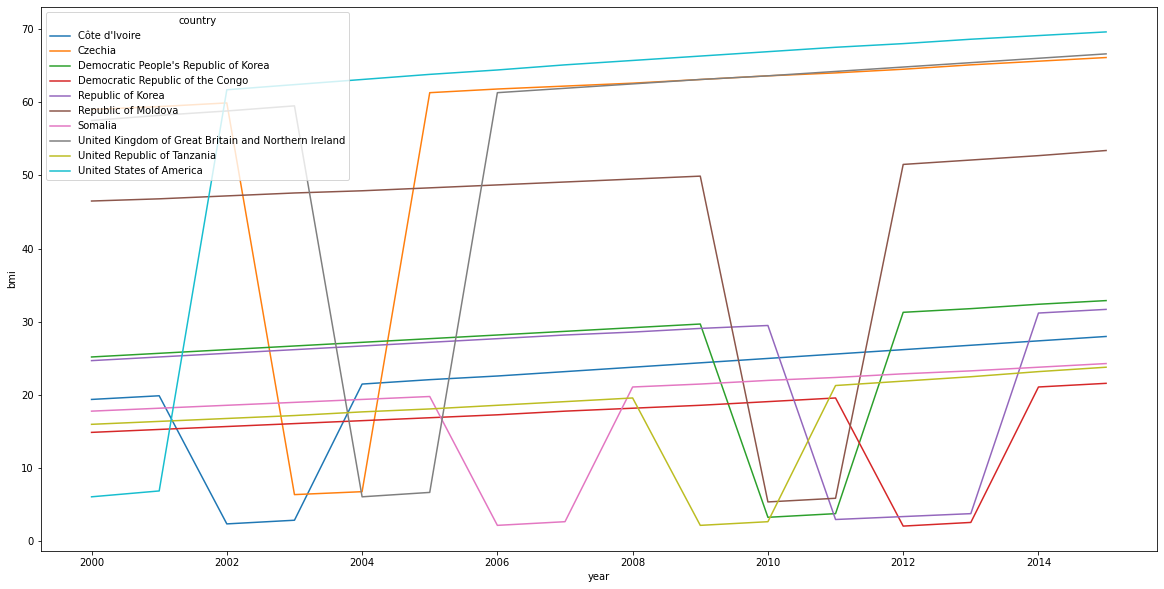

In [ ]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = foo, x = 'year', y = 'bmi', hue = 'country')

In [ ]:
# year을 일단 구간으로 나눠주자
yr_range1 = [2000,2001,2002,2003,2004]
yr_range2 = [2005,2006,2007,2008,2009]
yr_range3 = [2010,2011,2012,2013,2014,2015]

data.loc[data['year'].isin(yr_range1), 'year_range'] = int(1)
data.loc[data['year'].isin(yr_range2), 'year_range'] = int(2)
data.loc[data['year'].isin(yr_range3), 'year_range'] = int(3)
data.head(3)

country  year nationstatus  lifeexpectancy  adult_mortality  \
0  Afghanistan  2015   Developing        65.00000        263.00000   
1  Afghanistan  2014   Developing        59.90000        271.00000   
2  Afghanistan  2013   Developing        59.90000        268.00000   

   infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
0             62             0.01000              71.27962        90.18750   
1             64             0.01000              73.52358        90.18750   
2             66             0.01000              73.21925        90.18750   

   measles  ...  p_expenditure  diphtheria  under_four_hiv/aids       gdp  \
0     1154  ...        8.16000    65.00000              0.10000 584.25922   
1      492  ...        8.18000    62.00000              0.10000 612.69653   
2      430  ...        8.13000    64.00000              0.10000 631.74500   

      population  thinness_10to19  thinness_5to9  hd_index_income  \
0 33736496.00000         17.20000       17.30000          0.47900   
1   327582.00000         17.50000       17.50000          0.47600   
2 31731688.00000         17.70000       17.70000          0.47000   

   schooling_years  year_range  
0         10.10000     3.00000  
1         10.00000     3.00000  
2          9.90000     3.00000  

[3 rows x 23 columns]

In [ ]:
data['lifeexpectancy'].min(), data['lifeexpectancy'].max() 

(36.3, 89.0)

In [ ]:
data.loc[(data['lifeexpectancy']<=40), 'lifeexp_range'] = int(0)
data.loc[(data['lifeexpectancy']>40)&(data['lifeexpectancy']<=45), 'lifeexp_range'] = int(1)
data.loc[(data['lifeexpectancy']>45)&(data['lifeexpectancy']<=50), 'lifeexp_range'] = int(2)
data.loc[(data['lifeexpectancy']>50)&(data['lifeexpectancy']<=55), 'lifeexp_range'] = int(3)
data.loc[(data['lifeexpectancy']>55)&(data['lifeexpectancy']<=60), 'lifeexp_range'] = int(4)
data.loc[(data['lifeexpectancy']>60)&(data['lifeexpectancy']<=65), 'lifeexp_range'] = int(5)
data.loc[(data['lifeexpectancy']>65)&(data['lifeexpectancy']<=70), 'lifeexp_range'] = int(6)
data.loc[(data['lifeexpectancy']>70)&(data['lifeexpectancy']<=75), 'lifeexp_range'] = int(7)
data.loc[(data['lifeexpectancy']>75)&(data['lifeexpectancy']<=80), 'lifeexp_range'] = int(8)
data.loc[(data['lifeexpectancy']>80)&(data['lifeexpectancy']<=85), 'lifeexp_range'] = int(9)
data.loc[(data['lifeexpectancy']>85), 'lifeexp_range'] = int(10)

exp_temp = data[['hd_index_income', 'lifeexp_range']].groupby('lifeexp_range', as_index = False)['hd_index_income'].mean()
exp_temp

lifeexp_range  hd_index_income
0         0.00000          0.38100
1         1.00000          0.38524
2         2.00000          0.36882
3         3.00000          0.36890
4         4.00000          0.42172
5         5.00000          0.47423
6         6.00000          0.58272
7         7.00000          0.67682
8         8.00000          0.78535
9         9.00000          0.89006
10       10.00000          0.88337

In [ ]:
data.loc[(data['country'].isin(list_null_country)), 'hd_index_income'] = data.loc[(data['country'].isin(list_null_country)), 'lifeexp_range'].apply(lambda x : exp_temp.loc[x, 'hd_index_income'])
data.hd_index_income.isnull().sum()


0

In [ ]:
exp_temp = data[['schooling_years', 'lifeexp_range']].groupby('lifeexp_range', as_index = False)['schooling_years'].mean()
exp_temp

data.loc[(data['country'].isin(list_null_country)), 'schooling_years'] = data.loc[(data['country'].isin(list_null_country)), 'lifeexp_range'].apply(lambda x : exp_temp.loc[x, 'schooling_years'])
data.schooling_years.isnull().sum()

0

#### bmi

In [ ]:
data.loc[data['thinness_10to19'].isnull(), ['thinness_10to19', 'thinness_10to19', 'bmi']].sum()
# 세 컬럼이 같이 누락되었음을 알 수 있다

thinness_10to19   0.00000
thinness_10to19   0.00000
bmi               0.00000
dtype: float32

South Sudan, Sudan 데이터가 누락됨! <br>
문제는 2001-2015 전년도가 누락되어서, 참고할만한 샘플 데이터가 전혀 없다는 거. <br>
위에 상관관계 기준으로 clustermap 그렸을 때, bmi와 가장 밀접한 연관을 가지는 게 hd_index_income, schoolling_years임<br>
여기서 hd_index_income = (1/3)×(소득지수) + (1/3)×(기대수명지수) + (1/3)×(교육지수)<br>
즉, 기대수명, 소득, 교육 등 사회경제지수를 얼추 포함하고 있으므로, 얘를 통해 비슷한 수준의 국가를 가려낼 수 있다 가정하고 결측치를 채워줌! 

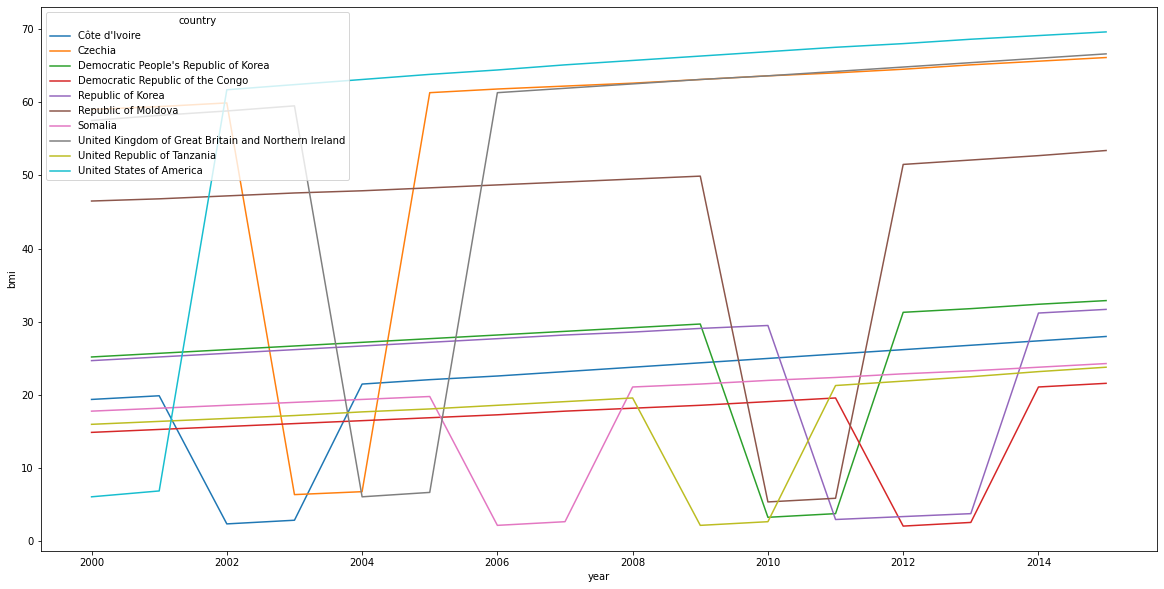

In [ ]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = foo, x = 'year', y = 'bmi', hue = 'country')

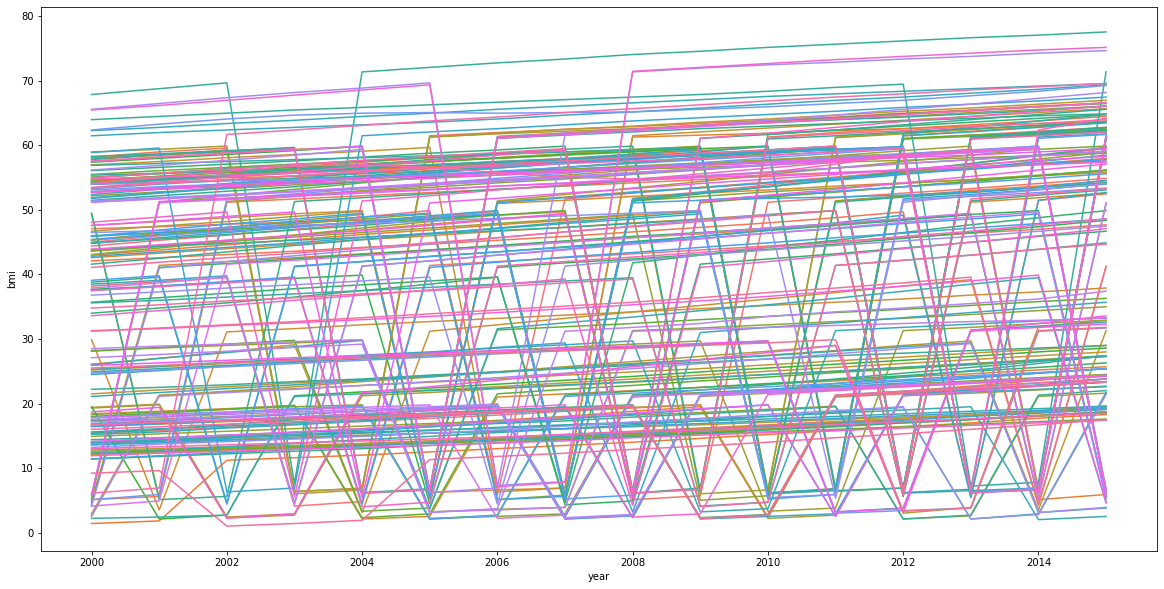

In [ ]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = data[['year', 'bmi', 'country']], x = 'year', y = 'bmi', hue = 'country', legend = False)

?... 이 데이터가 보이는 규칙적인 이상패턴의 정체는 뭘까. 일단 bmi 이상치부터 제거해줌

In [ ]:
# 2000년대 데이터에 결측치 있는지 = 없음 > 얘를 기준치로 잡아서, 이 값보다 작은 애들은 이상치로 간주하고 yr_range 별 평균치로 대체해줄거임
data[(data['country']==2000) & (data['bmi'].isnull())].shape

(0, 24)

In [ ]:
bar = data.loc[(data['year']==2000), ['country', 'bmi']]
bar.head(3)

country      bmi
15  Afghanistan 12.20000
31      Albania 45.00000
47      Algeria 44.40000

In [ ]:
data[['country']].nunique() - pd.DataFrame(data.loc[data['year']==2000, 'country']).nunique()

country    0
dtype: int64

혹시라도 2001~2015년 데이터 중, 2000년 데이터가 없는 게 있는지 확인했으나 다행히 없음. 예정대로 진행함

In [ ]:
b_temp = data[['country', 'year_range', 'bmi']]

b_cttemp = pd.crosstab( index = b_temp.country, columns = b_temp.year_range, values = b_temp.bmi, aggfunc = 'mean')
b_cttemp['country'] = b_cttemp.index
b_cttemp = pd.melt(b_cttemp, id_vars = 'country', )
b_cttemp.head(3)

country year_range    value
0  Afghanistan    1.00000 13.00000
1      Albania    1.00000 46.94000
2      Algeria    1.00000 46.14000

이상값 처리해주기에 앞서, 먼저 NaN값을 없애줘야 계산이 됨.<BR>
원본 데이터에 bmi >= 100인 샘플은 없음. 따라서 NaN값을 100으로 우선 채워준 후, 이상치 제거 > 결측치 처리 해줌

In [ ]:
print(data.bmi.isnull().sum())
data['bmi'] = data['bmi'].fillna(100.0)
print(data.bmi.isnull().sum())

32
0


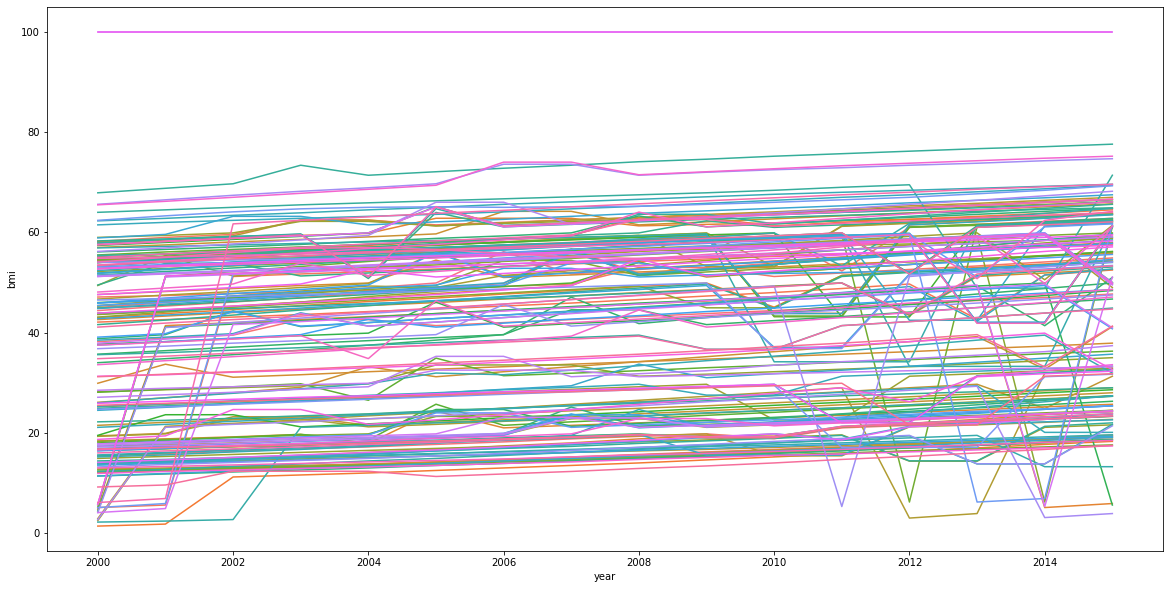

In [ ]:
for index in range(data.shape[0]):
    country = data.iloc[index,0]
    yr_range = data.iloc[index,-2]
    bmi_lower_limit = float(bar.loc[bar['country'] == country, 'bmi'])
    if yr_range == 3 :
        yr_range == 3
    else : 
        yr_range = yr_range + 1
    bmi_revised = b_cttemp.loc[(b_cttemp['country'] == country) & (b_cttemp['year_range'] == yr_range), 'value']
    # bmi 기준 2000년도 값보다 낮으면, 이상치로 간주하고 bmi_revised로 바꿔줌
    if data.iloc[index, 10] < bmi_lower_limit :
        data.iloc[index, 10] = bmi_revised

plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = data, x = 'year', y = 'bmi', hue = 'country', legend = False)

In [ ]:
data.loc[data['bmi']==100, 'country'].unique()

array(['South Sudan', 'Sudan'], dtype=object)

In [ ]:
bmi_temp = data.loc[data['nationstatus']=='Developing', ['lifeexp_range', 'year_range', 'lifeexpectancy', 'bmi']].groupby(['lifeexp_range', 'year_range'], as_index = False).mean()
bmi_temp['year_range'] = bmi_temp[['year_range']].round(decimals = 0)
bmi_temp

lifeexp_range  year_range  lifeexpectancy      bmi
0         0.00000     1.00000        39.00000 17.20000
1         0.00000     3.00000        36.30000 44.20000
2         1.00000     1.00000        43.60000 19.54615
3         1.00000     2.00000        44.17500 23.45000
4         2.00000     1.00000        47.44032 22.27484
5         2.00000     2.00000        47.93684 21.66140
6         2.00000     3.00000        49.16250 20.20833
7         3.00000     1.00000        52.73780 19.47439
8         3.00000     2.00000        53.46724 28.67845
9         3.00000     3.00000        52.86875 24.96910
10        4.00000     1.00000        58.09882 25.95624
11        4.00000     2.00000        57.28989 20.99869
12        4.00000     3.00000        58.06952 26.30683
13        5.00000     1.00000        63.31688 29.17506
14        5.00000     2.00000        63.08659 33.19045
15        5.00000     3.00000        62.97928 31.86336
16        6.00000     1.00000        67.66000 38.71917
17        6.00000     2.00000        67.68987 39.25788
18        6.00000     3.00000        67.71886 35.49171
19        7.00000     1.00000        72.78571 44.82927
20        7.00000     2.00000        73.34698 48.31753
21        7.00000     3.00000        73.49632 50.50847
22        8.00000     1.00000        77.48781 50.47683
23        8.00000     2.00000        77.02728 52.84110
24        8.00000     3.00000        76.64318 51.23674
25        9.00000     1.00000        81.50000 53.90000
26        9.00000     2.00000        82.50909 58.40000
27        9.00000     3.00000        82.17879 55.76667
28       10.00000     2.00000        87.40000 53.56000
29       10.00000     3.00000        87.40000 56.80000

In [ ]:
range_lifeexp = data.iloc[2465, -1]
range_year = data.iloc[2465, -2]
print(range_lifeexp, range_year)
float(bmi_temp.loc[(bmi_temp['lifeexp_range']==range_lifeexp)&(bmi_temp['year_range']==range_year), 'bmi'])


7.0 3.0


50.50846862792969

In [ ]:
bmi_index = data.loc[data['country'].isin(['South Sudan', 'Sudan'])].index.tolist()

for index in bmi_index : 
    range_lifeexp = data.iloc[index, -1]
    range_year = data.iloc[index, -2]
    # bmi
    bmi_value = float(bmi_temp.loc[(bmi_temp['lifeexp_range']==range_lifeexp)&(bmi_temp['year_range']==range_year), 'bmi'])
    data.at[index, 'bmi'] = bmi_value


data.bmi.describe()

count   2928.00000
mean      41.15160
std       17.76760
min        1.40000
25%       23.26750
50%       45.50000
75%       56.42500
max       77.60000
Name: bmi, dtype: float64

In [ ]:
data.loc[data['bmi']<10, 'country'].unique()

array(['Austria', 'Bangladesh', 'Belize', 'Cameroon', 'China', 'Egypt',
       'Fiji', 'Guatemala', 'Liberia', 'Portugal',
       'Saint Vincent and the Grenadines', 'Sao Tome and Principe',
       'Slovakia', 'South Africa', 'Switzerland',
       'United States of America', 'Viet Nam'], dtype=object)

In [ ]:
data.loc[(data['country']=='Viet Nam'), ['lifeexpectancy', 'bmi']].head(3)

lifeexpectancy      bmi
2874        76.00000 17.50000
2875        75.90000 16.70000
2876        75.70000 16.00000

bmi가 10 미만인 나라 데이터를 살펴보니, 평균 bmi가 50이라면 갑자기 5가 튀어나오는 것처럼, 수집 과정에서 오류가 발생한 것으로 보임<br>
따라서 10배로 보정해줌

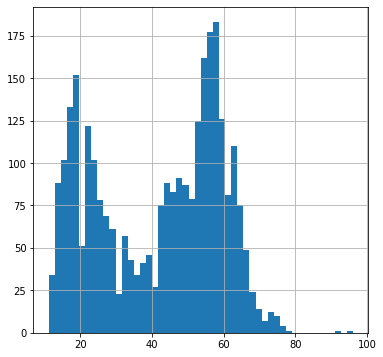

In [ ]:
data.loc[data['bmi']<10, 'bmi'] = data.loc[data['bmi']<10, 'bmi']*10
data['bmi'].hist(bins = 50, figsize = (6,6))

In [ ]:
# 의도치 못한 왜곡이 있어, 수동 수정해줌
data.loc[(data['country']=='Viet Nam') & (data['bmi']>90), 'bmi'] = data.loc[(data['country']=='Viet Nam') & (data['bmi']>90), 'bmi'] / 10


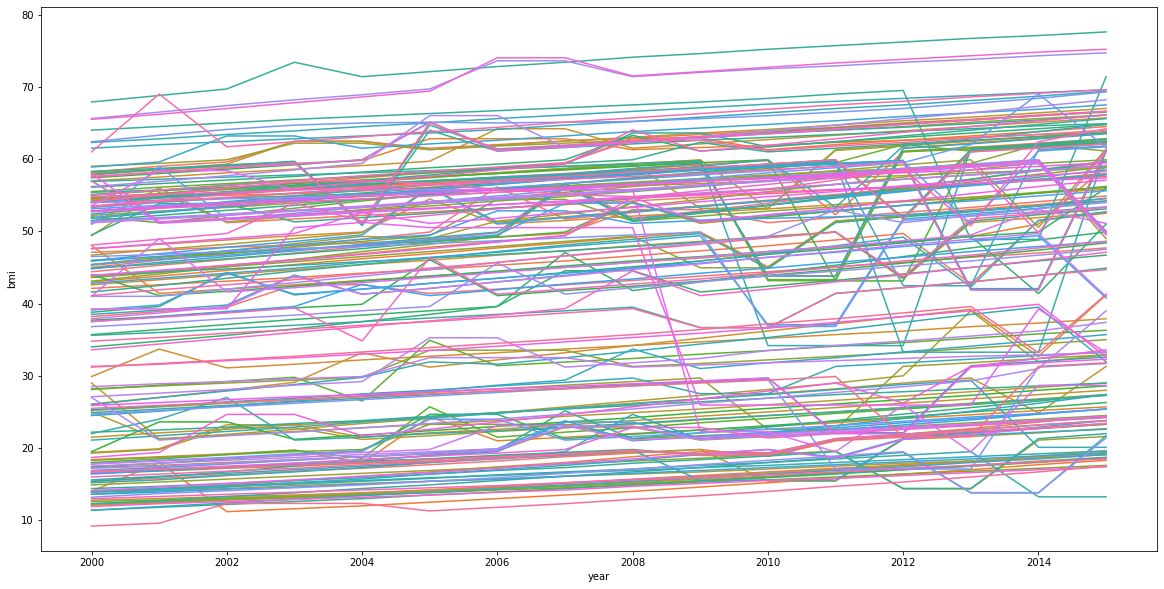

In [ ]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = data, x = 'year', y = 'bmi', hue = 'country', legend = False)

#### thinness_10to19/thinness_5to9
thinness 데이터가 결측된 나라는 또 수단, 남수단임<br>
본 프로젝트에는 test 데이터가 따로 존재하지 않아, data를 train과 test로 나눠 교차검증을 진행할 것. 따라서 수단과 남수단을 지워도 모델을 훈련하고 예측하는 데는 큰 문제가 없겠지만, 연습한다 치고 계속 기준을 잡아 채워넣어 보겠음.

In [ ]:
data.loc[data['thinness_10to19'].isnull(), 'country'].unique()

array(['South Sudan', 'Sudan'], dtype=object)

cluster map에 따르면, thinness와 가장 밀접하게 분류되는 건 measles, 1000명 당 홍역 확진 수 > infant_deaths, under_four_hiv/aids임. 얘네를 기준으로 결측치 예상해봄

In [ ]:
data.loc[data['thinness_10to19'].isnull(), ['country', 'measles', 'bmi', 'infant_deaths', 'under_four_hiv/aids', 'lifeexp_range']]

country  measles      bmi  infant_deaths  under_four_hiv/aids  \
2409  South Sudan      878 28.67845             26              3.40000   
2410  South Sudan      441 28.67845             26              3.50000   
2411  South Sudan      525 19.47439             26              3.60000   
2412  South Sudan     1952 25.95624             26              3.80000   
2413  South Sudan     1256 19.47439             27              3.90000   
2414  South Sudan        0 22.27484             27              4.00000   
2415  South Sudan        0 22.27484             27              4.20000   
2416  South Sudan        0 55.76667             27              4.20000   
2417  South Sudan        0 55.76667             27              4.20000   
2418  South Sudan        0 55.76667             28              4.10000   
2419  South Sudan        0 55.76667             28              3.90000   
2420  South Sudan        0 55.76667             29              3.80000   
2421  South Sudan        0 55.76667             29              3.50000   
2422  South Sudan        0 58.40000             30              3.30000   
2423  South Sudan        0 58.40000             30              3.00000   
2424  South Sudan        0 53.56000             31              2.70000   
2457        Sudan     3585 33.19045             58              0.30000   
2458        Sudan      676 39.25788             59              0.30000   
2459        Sudan     2813 25.95624             60              0.30000   
2460        Sudan     8523 25.95624             61              0.30000   
2461        Sudan     5616 25.95624             61              0.30000   
2462        Sudan      680 25.95624             62              0.30000   
2463        Sudan       68 25.95624             63              0.30000   
2464        Sudan      129 50.50847             64              0.30000   
2465        Sudan      327 50.50847             65              0.30000   
2466        Sudan      228 50.50847             66              0.20000   
2467        Sudan     1374 50.50847             66              0.20000   
2468        Sudan     9562 51.23674             68              0.20000   
2469        Sudan     4381 50.50847             69              0.20000   
2470        Sudan     4529 39.25788             70              0.20000   
2471        Sudan     4362 39.25788             71              0.20000   
2472        Sudan     2875 39.25788             71              0.10000   

      lifeexp_range  
2409        4.00000  
2410        4.00000  
2411        4.00000  
2412        4.00000  
2413        4.00000  
2414        3.00000  
2415        3.00000  
2416        3.00000  
2417        3.00000  
2418        3.00000  
2419        3.00000  
2420        3.00000  
2421        4.00000  
2422        3.00000  
2423        2.00000  
2424        2.00000  
2457        5.00000  
2458        5.00000  
2459        5.00000  
2460        5.00000  
2461        5.00000  
2462        5.00000  
2463        5.00000  
2464        5.00000  
2465        5.00000  
2466        5.00000  
2467        6.00000  
2468        4.00000  
2469        4.00000  
2470        4.00000  
2471        4.00000  
2472        4.00000

In [ ]:
# South Sudan 다른 feature 기준으로 예상해봄
data.loc[(data['thinness_10to19'].notnull())&
         (data['infant_deaths']>=25)&(data['infant_deaths']<=31)&
         (data['under_four_hiv/aids']>=2.7)& (data['under_four_hiv/aids']<=4.2)&
         (data['nationstatus']=='Developing'), 
         ['thinness_10to19', 'thinness_5to9'] ].mean()

thinness_10to19   6.30000
thinness_5to9     6.10000
dtype: float32

In [ ]:
data.loc[data['country']=='South Sudan', 'thinness_10to19'] = 6.30000
data.loc[data['country']=='South Sudan', 'thinness_5to9'] = 6.10000

In [ ]:
# Sudan 다른 feature 기준으로 예상해봄
data.loc[(data['thinness_10to19'].notnull())&
         (data['infant_deaths']>=58)&(data['infant_deaths']<=71)&
         (data['under_four_hiv/aids']>=0.1)& (data['under_four_hiv/aids']<=0.5)&
         (data['nationstatus']=='Developing'), 
         ['thinness_10to19', 'thinness_5to9'] ].mean()

thinness_10to19    6.50370
thinness_5to9     10.09259
dtype: float32

In [ ]:
data.loc[data['country']=='Sudan', 'thinness_10to19'] = 6.50370
data.loc[data['country']=='Sudan', 'thinness_5to9'] = 10.09259

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

alcoholconsumption    193
p_expenditure         226
gdp                   443
population            644
dtype: int64

#### alcoholconsumption
아래와 같이 데이터를 확인해보았을 때, 2015년도 전 데이터와, South Sudan 전 데이터가 결측되었음을 알 수 있다<br>
수단 : 상관관계가 가장 높은 bmi 기준으로 값 유추해서 넣어줌<br>
그 외 2015년 결측치 : 각 국가 별 평균 값 넣어줌

In [ ]:
data.loc[data['alcoholconsumption'].isnull(), 'year'].value_counts()

2015    177
2005      2
2014      1
2013      1
2012      1
2011      1
2010      1
2009      1
2008      1
2007      1
2006      1
2004      1
2003      1
2002      1
2001      1
2000      1
Name: year, dtype: int64

In [ ]:
data.loc[(data['alcoholconsumption'].isnull())&(data['year']==2004), 'country']

2420    South Sudan
Name: country, dtype: object

In [ ]:
data.loc[(data['alcoholconsumption'].isnull())&(data['country']=='South Sudan'), :'bmi']

country  year nationstatus  lifeexpectancy  adult_mortality  \
2409  South Sudan  2015   Developing        57.30000        332.00000   
2410  South Sudan  2014   Developing        56.60000        343.00000   
2411  South Sudan  2013   Developing        56.40000        345.00000   
2412  South Sudan  2012   Developing        56.00000        347.00000   
2413  South Sudan  2011   Developing        55.40000        355.00000   
2414  South Sudan  2010   Developing        55.00000        359.00000   
2415  South Sudan  2009   Developing        54.30000        369.00000   
2416  South Sudan  2008   Developing        53.60000        377.00000   
2417  South Sudan  2007   Developing        53.10000        381.00000   
2418  South Sudan  2006   Developing        52.50000        383.00000   
2419  South Sudan  2005   Developing        51.90000        383.00000   
2420  South Sudan  2004   Developing        51.40000        383.00000   
2421  South Sudan  2003   Developing        58.00000        383.00000   
2422  South Sudan  2002   Developing        52.00000        382.00000   
2423  South Sudan  2001   Developing        49.60000        381.00000   
2424  South Sudan  2000   Developing        48.90000         38.00000   

      infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
2409             26                 NaN               0.00000        90.18750   
2410             26                 NaN              46.07447        92.00000   
2411             26                 NaN              47.44453        92.00000   
2412             26                 NaN              38.33823        93.00000   
2413             27                 NaN               0.00000        92.00000   
2414             27                 NaN               0.00000        91.00000   
2415             27                 NaN               0.00000        92.00000   
2416             27                 NaN               0.00000        91.00000   
2417             27                 NaN               0.00000        92.00000   
2418             28                 NaN               0.00000        89.00000   
2419             28                 NaN               0.00000        92.00000   
2420             29                 NaN               0.00000        89.00000   
2421             29                 NaN               0.00000        83.00000   
2422             30                 NaN               0.00000        88.00000   
2423             30                 NaN               0.00000        87.00000   
2424             31                 NaN               0.00000        89.00000   

      measles      bmi  
2409      878 28.67845  
2410      441 28.67845  
2411      525 19.47439  
2412     1952 25.95624  
2413     1256 19.47439  
2414        0 22.27484  
2415        0 22.27484  
2416        0 55.76667  
2417        0 55.76667  
2418        0 55.76667  
2419        0 55.76667  
2420        0 55.76667  
2421        0 55.76667  
2422        0 58.40000  
2423        0 58.40000  
2424        0 53.56000

In [ ]:
alc_band1 = [2000,2001,2002,2003,2004,2005,2006,2007,2008]
alc_value1 = data.loc[(data['nationstatus']=='Developing')&(data['alcoholconsumption'].notnull())&
         (data['bmi']>55)&(data['bmi']<60)&
         (data['lifeexpectancy']>63.6)&(data['lifeexpectancy']<70), 'alcoholconsumption'].mean()

In [ ]:
alc_band2 = [2009,2010,2011,2013]
alc_value2 = data.loc[(data['nationstatus']=='Developing')&(data['alcoholconsumption'].notnull())&
         (data['bmi']>19)&(data['bmi']<25)&
         (data['lifeexpectancy']>50)&(data['lifeexpectancy']<60), 'alcoholconsumption'].mean()

In [ ]:
alc_band3 = [2012, 2013,2014,2015]
alc_value3 = data.loc[(data['nationstatus']=='Developing')&(data['alcoholconsumption'].notnull())&
         (data['bmi']>25)&(data['bmi']<30)&
         (data['lifeexpectancy']>54)&(data['lifeexpectancy']<60), 'alcoholconsumption'].mean()

In [ ]:
data.loc[(data['country']=='South Sudan')&
         (data['year'].isin(alc_band1)), 'alcoholconsumption'] = alc_value1
data.loc[(data['country']=='South Sudan')&
         (data['year'].isin(alc_band2)), 'alcoholconsumption'] = alc_value2
data.loc[(data['country']=='South Sudan')&
         (data['year'].isin(alc_band3)), 'alcoholconsumption'] = alc_value3

In [ ]:
alc_temp = data.loc[data['alcoholconsumption'].notnull(), :'alcoholconsumption'].groupby('country', as_index = False)['alcoholconsumption'].mean()
alc_temp.head(3)

country  alcoholconsumption
0  Afghanistan             0.01437
1      Albania             4.84875
2      Algeria             0.40667

In [ ]:
alc_index = data.loc[data['alcoholconsumption'].isnull(), ['country', 'alcoholconsumption']].index.tolist()

for index in alc_index :
    country = data.iloc[index, 0]
    # alcoholconsumption 
    data.at[index, 'alcoholconsumption'] = float(alc_temp.loc[alc_temp['country']==country, 'alcoholconsumption'])
    

In [ ]:
data['alcoholconsumption'].isnull().sum()

0

#### gdp 외 feature 두 개 제거

In [ ]:
data.isnull().mean()[data.isnull().mean()>0]*100

p_expenditure    7.71858
gdp             15.12978
population      21.99454
dtype: float64

전체 국가에 대해서 population, 1인당 gdp 데이터 구하기가 어려움. 따라서 p_expenditure_pergdp가 위와 관련된 경제적 상황을 대변하리라 가정하고, p_expenditure/gdp/population feature 삭제함

In [ ]:
data = data.drop('p_expenditure', axis = 1)
data = data.drop('gdp', axis = 1)
data = data.drop('population', axis = 1)
data.columns

Index(['country', 'year', 'nationstatus', 'lifeexpectancy', 'adult_mortality',
       'infant_deaths', 'alcoholconsumption', 'p_expenditure_pergdp',
       'hepb_vac_rates', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'diphtheria', 'under_four_hiv/aids', 'thinness_10to19', 'thinness_5to9',
       'hd_index_income', 'schooling_years', 'year_range', 'lifeexp_range'],
      dtype='object')

In [ ]:
data.isnull().sum().sum()

0

### 이상치 제거<br>
1. 0 ~ 25% - hepb_vac_rates / polio / diphtheria / schooling years
2. 75% ~ 100% : adult_mortality / infant_deaths / p_expenditure_pergdp / measles / under_five_deaths ~/ gdp / population~
3. p_expenditure_pergdp : GDP 대비 의료비 지출(%) - 퍼센트 비율인데 75% = 441.534144....? 물론 예상치 못한 이유로 GDP 이상으로 지출을 할 수도 있겠지, 라고 생각을 해보긴 했는데. 그래도 400%, 19500%는 뭔가 에러 혹은 이상치 영역이 맞는 듯
4. measles : 홍역, 인구 1000명당 보고된 환자 수 - 홍역은 재발하는 병이 아니라는데, 1000 이상의 값 조정

#### hepb_vac_rates
결측치 처리 시, 오기입된 것으로 보이는 10미만 값들을 보정해주었더니, 이상치라 여겨지던 0~25% 값들이 제거됨. <br>따라서 추가 전처리 작업은 진행하지 않음

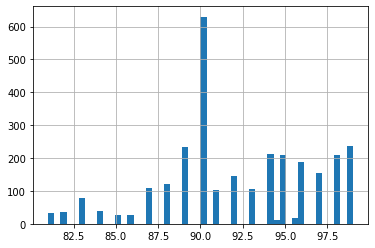

In [ ]:
data['hepb_vac_rates'].hist(bins = 50)

In [ ]:
data.loc[data['nationstatus']=='Developed', 'hepb_vac_rates'].describe()


count   512.00000
mean     94.46680
std       2.62085
min      88.00000
25%      94.00000
50%      95.00000
75%      96.00000
max      99.00000
Name: hepb_vac_rates, dtype: float64

#### polio / diphteria

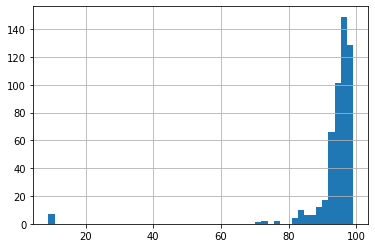

In [ ]:
data.loc[(data['nationstatus']=='Developed'),'polio'].hist(bins = 50)

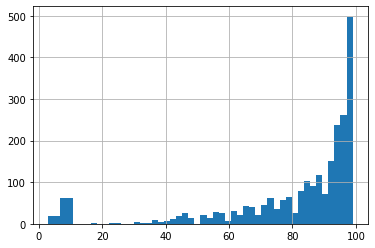

In [ ]:
data.loc[(data['nationstatus']=='Developing'),'polio'].hist(bins = 50)

로그 취해보았지만, 분포에 별 다른 차이 없음. Scale만 달라짐.<br>
따라서 그냥 0~25% 구간만 확인해보고 처리하고 넘기기로 함

In [ ]:
data['polio'].describe()

count   2928.00000
mean      82.51913
std       23.27940
min        3.00000
25%       78.00000
50%       93.00000
75%       97.00000
max       99.00000
Name: polio, dtype: float64

In [ ]:
# 1사분위 수인 78 기준, 미만의 값을 가지는 국가 샘플 탐색
# data.loc[(data['polio']<78.00000), ['country', 'year', 'polio', 'adult_mortality', 'lifeexpectancy']]
data.loc[(data['polio']<78.00000), 'country'].unique()

array(['Afghanistan', 'Angola', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', 'Democratic Republic of the Congo',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Jamaica', 'Kenya', 'Kiribati',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Lithuania', 'Madagascar', 'Malawi', 'Mali', 'Malta',
       'Mauritania', 'Micronesia (Federated States of)', 'Mozambique',


In [ ]:
data.loc[(data['country']=='Eritrea'), ['country', 'year', 'polio', 'adult_mortality', 'lifeexpectancy']]

country  year    polio  adult_mortality  lifeexpectancy
850  Eritrea  2015 95.00000        255.00000        64.70000
851  Eritrea  2014 94.00000        261.00000        64.40000
852  Eritrea  2013 94.00000        266.00000        64.00000
853  Eritrea  2012 94.00000        274.00000        63.60000
854  Eritrea  2011 96.00000        286.00000        62.90000
855  Eritrea  2010  9.00000        298.00000        62.10000
856  Eritrea  2009 92.00000        311.00000        61.40000
857  Eritrea  2008 94.00000        322.00000        67.00000
858  Eritrea  2007 91.00000        329.00000        62.00000
859  Eritrea  2006 94.00000        336.00000        59.70000
860  Eritrea  2005 96.00000         34.00000        59.40000
861  Eritrea  2004 98.00000        342.00000        59.10000
862  Eritrea  2003 95.00000        343.00000        58.80000
863  Eritrea  2002 92.00000        343.00000        58.50000
864  Eritrea  2001 89.00000        345.00000        58.10000
865  Eritrea  2000 82.00000        593.00000        45.30000

위와 같이 임의의 여러 국가를 대상으로 데이터를 확인해보았을 때, <br>
    - 10 미만의 값 : 수집 과정에서 0 하나가 누락된 오기입으로 보임 (-> 10배 보정)<br>
    = 10 이상, 78 이하의 값 : 국가 수준에 따른 정상 샘플

In [ ]:
# data.loc[(data['polio']<78.00000)&(data['nationstatus']=='Developing'), ['country', 'year', 'polio', 'adult_mortality', 'lifeexpectancy']]
data.loc[(data['polio']<10.00000), 'polio'] = data.loc[(data['polio']<10.00000), 'polio'] * 10
data['polio'].describe()

count   2928.00000
mean      86.41666
std       14.98034
min       17.00000
25%       81.00000
50%       93.00000
75%       97.00000
max       99.00000
Name: polio, dtype: float64

diphtheria 데이터 확인

In [ ]:
data['diphtheria'].describe()

count   2928.00000
mean      82.21619
std       23.68810
min        2.00000
25%       78.00000
50%       93.00000
75%       97.00000
max       99.00000
Name: diphtheria, dtype: float64

In [ ]:
data.loc[(data['diphtheria']<10.00000), 'country'].unique()

array(['Afghanistan', 'Angola', 'Armenia', 'Australia', 'Belarus',
       'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', 'Democratic Republic of the Congo',
       'Denmark', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Iceland',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Jamaica',
       'Kenya', 'Kiribati', "Lao People's Democratic Republic", 'Lebanon',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mauritania',
       'Mozambique', 'Myanmar', 'Nepal', 'New Zealand', 'Niger',
       'Nigeria', 'Norway', 'Panama', 'Peru', 'Philippines', 'Qatar',
       'Republic of Moldova', 'Rwanda', 'Saint Lucia', 'Senegal',
       'Solomon Islands', 'Somalia', 'South

In [ ]:
data.loc[(data['country']=='Uruguay'), ['country','diphtheria']]

country  diphtheria
2810  Uruguay    95.00000
2811  Uruguay    95.00000
2812  Uruguay    94.00000
2813  Uruguay    95.00000
2814  Uruguay    95.00000
2815  Uruguay    95.00000
2816  Uruguay    95.00000
2817  Uruguay    94.00000
2818  Uruguay    94.00000
2819  Uruguay    95.00000
2820  Uruguay    96.00000
2821  Uruguay    94.00000
2822  Uruguay    91.00000
2823  Uruguay    95.00000
2824  Uruguay    94.00000
2825  Uruguay     9.00000

polio와 마찬가지로, diphtheria 역시 임의의 여러 국가를 대상으로 데이터를 확인해보았을 때,
- 10 미만의 값 : 수집 과정에서 0 하나가 누락된 오기입으로 보임 (-> 10배 보정)
= 10 이상, 78 이하의 값 : 국가 수준에 따른 정상 샘플

In [ ]:
data.loc[(data['diphtheria']<10.00000), 'diphtheria'] = data.loc[(data['diphtheria']<10.00000), 'diphtheria']*10
data['diphtheria'].describe()

count   2928.00000
mean      86.04303
std       15.76186
min       16.00000
25%       81.00000
50%       93.00000
75%       97.00000
max       99.00000
Name: diphtheria, dtype: float64

#### schooling years

In [ ]:
data['schooling_years'].describe()

count   2928.00000
mean      11.97656
std        3.33909
min        0.00000
25%       10.00000
50%       12.30000
75%       14.40000
max       20.70000
Name: schooling_years, dtype: float64

In [ ]:
data.loc[data['schooling_years']<(11.97656-3*3.33909), 'country'].unique()

array(['Antigua and Barbuda', 'Bosnia and Herzegovina',
       'Equatorial Guinea', 'Micronesia (Federated States of)',
       'Montenegro', 'South Sudan', 'Timor-Leste', 'Turkmenistan'],
      dtype=object)

In [ ]:
data.loc[data['country']=='Montenegro', 'schooling_years']

1732   15.10000
1733   15.10000
1734   15.10000
1735   15.10000
1736   15.10000
1737   15.00000
1738   14.60000
1739   14.20000
1740   13.60000
1741   13.20000
1742   12.80000
1743   12.60000
1744    0.00000
1745    0.00000
1746    0.00000
1747    0.00000
Name: schooling_years, dtype: float32

데이터를 살펴보았을 때, 위와 같이 누락되었지만 0으로 기입된, 무의미한 데이터가 확인됨<br>
모든 나라가 초기 값이 누락되었으므로, 각 나라 별 최소값을 넣어주기로 함

In [ ]:
# sch_temp 
list_country = data.loc[data['schooling_years']<(11.97656-3*3.33909), 'country'].unique().tolist()

sch_temp = pd.DataFrame(data.loc[(data['schooling_years']>0), ['year', 'country', 'schooling_years']].groupby('country', as_index = False)['schooling_years'].min())
sch_temp.head()


country  schooling_years
0          Afghanistan          5.50000
1              Albania         10.60000
2              Algeria         10.70000
3               Angola          4.60000
4  Antigua and Barbuda         13.80000

In [ ]:
sch_index = data.loc[data['schooling_years']==0, ['country', 'schooling_years']].index.tolist()

for index in sch_index :
    country = data.iloc[index, 0]
    data.at[index, 'schooling_years'] = float(sch_temp.loc[sch_temp['country']==country, 'schooling_years'])

data['schooling_years'].describe()

count   2928.00000
mean      12.08192
std        3.16179
min        2.80000
25%       10.10000
50%       12.40000
75%       14.40000
max       20.70000
Name: schooling_years, dtype: float64

#### adult_mortality 

In [ ]:
data['adult_mortality'].describe()


count   2928.00000
mean     164.79645
std      124.29208
min        1.00000
25%       74.00000
50%      144.00000
75%      228.00000
max      723.00000
Name: adult_mortality, dtype: float64

1. 0~25% 구간 - 특히 10 미만에 오기입된 값이 들어가 있는 건 아닌지<br>
2. 75%~100 구간 - 갑자기 값이 확 뛰는 구간 데이터 확인

In [ ]:
data.loc[(data['adult_mortality']<10), 'country'].unique()

array(['Afghanistan', 'Albania', 'Australia', 'Austria', 'Bahrain',
       'Barbados', 'Belgium', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei Darussalam', 'Cameroon', 'Canada', 'Chad', 'Chile',
       'Costa Rica', 'Cyprus', 'Czechia', 'Fiji', 'Finland', 'Gambia',
       'Germany', 'Greece', 'Guinea-Bissau', 'Haiti', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kiribati', 'Kuwait',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Malta', 'Mozambique',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Portugal', 'Qatar', 'Russian Federation', 'Saudi Arabia',
       'Senegal', 'Singapore', 'Slovenia', 'Solomon Islands', 'Spain',
       'Swaziland', 'Sweden', 'Switzerland', 'Tunisia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland', 'Zimbabwe'],
      dtype=object)

In [ ]:
data.loc[(data['country']=='Barbados'), 'adult_mortality']

208    98.00000
209     1.00000
210    11.00000
211    12.00000
212    14.00000
213    16.00000
214    19.00000
215   111.00000
216   113.00000
217   115.00000
218   117.00000
219   119.00000
220   121.00000
221   123.00000
222   125.00000
223   127.00000
Name: adult_mortality, dtype: float32

In [ ]:
data.loc[(data['country']=='Saudi Arabia'), 'adult_mortality']

2233   88.00000
2234   88.00000
2235   89.00000
2236    9.00000
2237   92.00000
2238   94.00000
2239   97.00000
2240   98.00000
2241   99.00000
2242    1.00000
2243   11.00000
2244   12.00000
2245   13.00000
2246   15.00000
2247   17.00000
2248   11.00000
Name: adult_mortality, dtype: float32

앞의 polio, diphtheria 등과 달리, adult_mortality는 1000명이 기준으로 국가에 따라 아래의 두 경우가 존재함<br>
1. *10
2. *100 > any를 이용해주자! 100이 넘는 게 하나라도 존재하면, 10미만 * 100

In [ ]:
data['adult_mor_over100'] = data['adult_mortality']>=100
data['adult_between_10_and_100'] = (data['adult_mortality']<100)&(data['adult_mortality']>=10)
temp_over100 = data[['country', 'adult_mor_over100']].groupby('country', as_index = False)['adult_mor_over100'].sum()
temp_btwn_100 = data[['country', 'adult_between_10_and_100']].groupby('country', as_index = False)['adult_between_10_and_100'].sum()

adult100_temp = temp_over100.merge(right = temp_btwn_100, on = 'country')
adult100_temp.head(3)

country  adult_mor_over100  adult_between_10_and_100
0  Afghanistan                 15                         0
1      Albania                  0                        13
2      Algeria                 13                         3

In [ ]:
data['adult_under10'] = (data['adult_mortality']<10)&(data['adult_mortality']>0)
temp_under10 = data[['country', 'adult_under10']].groupby('country', as_index = False)['adult_under10'].sum()
adult100_temp = adult100_temp.merge(right = temp_under10, on = 'country')
adult100_temp.head()

country  adult_mor_over100  adult_between_10_and_100  \
0          Afghanistan                 15                         0   
1              Albania                  0                        13   
2              Algeria                 13                         3   
3               Angola                 14                         2   
4  Antigua and Barbuda                 14                         2   

   adult_under10  
0              1  
1              3  
2              0  
3              0  
4              0

In [ ]:
adult100_temp['under10_multiple_10'] = ((adult100_temp['adult_mor_over100']==0) & (adult100_temp['adult_between_10_and_100']>0))
adult100_temp['under10_multiple_100'] = ((adult100_temp['adult_between_10_and_100']==0) & (adult100_temp['adult_mor_over100']>0))
adult100_temp.head()

country  adult_mor_over100  adult_between_10_and_100  \
0          Afghanistan                 15                         0   
1              Albania                  0                        13   
2              Algeria                 13                         3   
3               Angola                 14                         2   
4  Antigua and Barbuda                 14                         2   

   adult_under10  under10_multiple_10  under10_multiple_100  
0              1                False                  True  
1              3                 True                 False  
2              0                False                 False  
3              0                False                 False  
4              0                False                 False

In [ ]:
mul_10_list = adult100_temp.loc[
                               (adult100_temp['adult_under10']>0) & (adult100_temp['under10_multiple_10']==True), 'country'
                               ].unique().tolist()

In [ ]:
mul_100_list = adult100_temp.loc[
                               (adult100_temp['adult_under10']>0) & (adult100_temp['under10_multiple_100']==True), 'country'
                               ].unique().tolist()

In [ ]:
# *10
data.loc[
         (data['country'].isin(mul_10_list))&
         (data['adult_mortality']>0)&(data['adult_mortality']<10),
         'adult_mortality'
] = data.loc[(data['country'].isin(mul_10_list))&(data['adult_mortality']>0)&(data['adult_mortality']<10),'adult_mortality'] * 10

# *100
data.loc[
         (data['country'].isin(mul_100_list))&
         (data['adult_mortality']>0)&(data['adult_mortality']<10),
         'adult_mortality'
] = data.loc[(data['country'].isin(mul_100_list))&(data['adult_mortality']>0)&(data['adult_mortality']<10),'adult_mortality'] * 100

data['adult_mortality'].describe()


count   2928.00000
mean     166.16734
std      123.08683
min        1.00000
25%       75.00000
50%      144.00000
75%      228.00000
max      723.00000
Name: adult_mortality, dtype: float64

In [ ]:
data[data['country']=='Slovenia']

country  year nationstatus  lifeexpectancy  adult_mortality  \
2345  Slovenia  2015    Developed        88.00000         74.00000   
2346  Slovenia  2014    Developed        87.00000         76.00000   
2347  Slovenia  2013    Developed        85.00000         78.00000   
2348  Slovenia  2012    Developed        82.00000         81.00000   
2349  Slovenia  2011    Developed        79.80000         84.00000   
2350  Slovenia  2010    Developed        79.50000         87.00000   
2351  Slovenia  2009    Developed        79.10000          9.00000   
2352  Slovenia  2008    Developed        78.90000         96.00000   
2353  Slovenia  2007    Developed        78.30000         12.00000   
2354  Slovenia  2006    Developed        78.10000         17.00000   
2355  Slovenia  2005    Developed        77.50000         14.00000   
2356  Slovenia  2004    Developed        77.20000        113.00000   
2357  Slovenia  2003    Developed        76.50000        119.00000   
2358  Slovenia  2002    Developed        76.60000        117.00000   
2359  Slovenia  2001    Developed        76.20000        124.00000   
2360  Slovenia  2000    Developed        76.00000        122.00000   

      infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
2345              0            10.75467               0.00000        94.00000   
2346              0            10.46000              31.13493        95.00000   
2347              0             9.53000             259.77869        95.00000   
2348              0            10.95000            3283.02490        95.00000   
2349              0            10.61000            3343.02612        95.50000   
2350              0            10.32000            3187.49634        95.50000   
2351              0            10.52000            3505.38940        96.00000   
2352              0            10.94000             392.95886        96.00000   
2353              0            11.02000            3256.72412        95.00000   
2354              0            12.26000            2724.17798        95.00000   
2355              0            11.14000            2503.71436        95.00000   
2356              0            10.00000             235.37852        94.00000   
2357              0            11.58000             203.32521        94.50000   
2358              0             9.29000            1617.47339        89.00000   
2359              0            10.80000             196.30263        91.00000   
2360              0            11.90000             161.44739        89.00000   

      measles  ...  under_four_hiv/aids  thinness_10to19  thinness_5to9  \
2345       18  ...              0.10000          1.40000        1.30000   
2346       52  ...              0.10000          1.40000        1.40000   
2347        1  ...              0.10000          1.40000        1.40000   
2348        2  ...              0.10000          1.50000        1.50000   
2349       22  ...              0.10000          1.60000        1.60000   
2350        2  ...              0.10000          1.60000        1.60000   
2351        0  ...              0.10000          1.70000        1.70000   
2352        0  ...              0.10000          1.70000        1.70000   
2353        0  ...              0.10000          1.80000        1.80000   
2354        0  ...              0.10000          1.80000        1.90000   
2355        0  ...              0.10000          1.90000        2.00000   
2356        0  ...              0.10000          2.00000        2.00000   
2357        0  ...              0.10000          2.00000        2.10000   
2358        0  ...              0.10000          2.10000        2.20000   
2359        0  ...              0.10000          2.20000        2.20000   
2360        0  ...              0.10000          2.20000        2.30000   

      hd_index_income  schooling_years  year_range  lifeexp_range  \
2345          0.88800         17.30000     3.00000       10.00000   
2346          0.88800   

In [ ]:
under100_list = adult100_temp.loc[
                               (adult100_temp['adult_under10']>0) & (adult100_temp['adult_mor_over100']==0), 'country'
                               ].unique().tolist()

In [ ]:
# /10
data.loc[
         (data['country'].isin(under100_list))&
         (data['adult_mortality']>100),
         'adult_mortality'
] = (data.loc[(data['country'].isin(under100_list))&(data['adult_mortality']>100),'adult_mortality'] / 10)

data['adult_mortality'].describe()

count   2928.00000
mean     166.16734
std      123.08683
min        1.00000
25%       75.00000
50%      144.00000
75%      228.00000
max      723.00000
Name: adult_mortality, dtype: float64

#### hd_index_income

In [ ]:
data['hd_index_income'].describe()

count   2928.00000
mean       0.62602
std        0.21013
min        0.00000
25%        0.48800
50%        0.67600
75%        0.78300
max        0.94800
Name: hd_index_income, dtype: float64

In [ ]:
len(data.loc[data['hd_index_income']==0, 'country'])/len(data)

0.04439890710382514

비율은 5%밖에 안 됨. 그러면 어떤 놈들이 인간개발지수를 빵꾸냈는지 보자

In [ ]:
data.loc[data['hd_index_income']==0, 'country'].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bhutan',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Cabo Verde', 'Chad',
       'Comoros', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Georgia',
       'Grenada', 'Guinea-Bissau', 'Kiribati', 'Lebanon', 'Madagascar',
       'Micronesia (Federated States of)', 'Montenegro', 'Nigeria',
       'Oman', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Seychelles', 'South Sudan', 'Suriname',
       'The former Yugoslav republic of Macedonia', 'Timor-Leste',
       'Turkmenistan', 'Uzbekistan', 'Vanuatu'], dtype=object)

In [ ]:
data.loc[data['country'].str.contains('Nigeria'), 'hd_index_income']

1893   0.52500
1894   0.52100
1895   0.51400
1896   0.50700
1897   0.50000
1898   0.49200
1899   0.48700
1900   0.48100
1901   0.47700
1902   0.46600
1903   0.46300
1904   0.44500
1905   0.00000
1906   0.00000
1907   0.00000
1908   0.00000
Name: hd_index_income, dtype: float32

데이터를 살펴본 결과, 2000-2015년 사이 데이터가 랜덤하게 빠지기보다는, 초기 몇 년이 연속해서 누락된 것을 0값으로 채워넣은 걸로 판단됨.<br>
따라서 각 국가 별 0이 아닌 최소값을 구해, 0을 대체해주기로 함

In [ ]:
# sch_temp 
list_country = data.loc[data['hd_index_income']==0, 'country'].unique().tolist()

hd_temp = pd.DataFrame(data.loc[(data['hd_index_income']>0), ['year', 'country', 'hd_index_income']].groupby('country', as_index = False)['hd_index_income'].min())
hd_temp.head()


country  hd_index_income
0          Afghanistan          0.33800
1              Albania          0.65600
2              Algeria          0.63600
3               Angola          0.38200
4  Antigua and Barbuda          0.77300

In [ ]:
# NaN값 때문에 발생하는 'TypeError: cannot convert the series to <class 'float'>'에러 방지하기 위해,
# 혹시라도 모든 hd_index_income == 0이어서 hd_temp에서 사라진 국가가 있는지 확인해봄
set(data.country.unique()) - set(hd_temp.country.unique())

set()

In [ ]:
hd_index = data.loc[data['hd_index_income']==0, ['country', 'hd_index_income']].index.tolist()

for index in hd_index :
    country = data.iloc[index, 0]
    data.at[index, 'hd_index_income'] = float(hd_temp.loc[hd_temp['country']==country, 'hd_index_income'])

data['hd_index_income'].describe()

count   2928.00000
mean       0.65201
std        0.16543
min        0.25300
25%        0.50875
50%        0.68200
75%        0.78509
max        0.94800
Name: hd_index_income, dtype: float64

#### infant_deaths

In [ ]:
data['infant_deaths'].describe()

count   2928.00000
mean      30.40745
std      118.11445
min        0.00000
25%        0.00000
50%        3.00000
75%       22.00000
max     1800.00000
Name: infant_deaths, dtype: float64

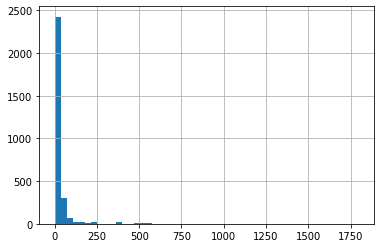

In [ ]:
data['infant_deaths'].hist(bins = 50)

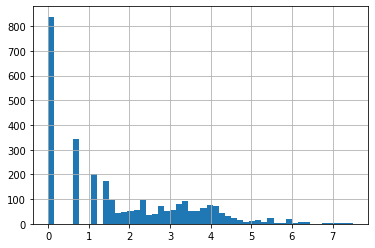

In [ ]:
np.log1p(data['infant_deaths']).hist(bins = 50)

In [ ]:
data.loc[data['infant_deaths']==0, 'country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan',
       'Bosnia and Herzegovina', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Fiji', 'Finland', 'Greece', 'Grenada', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Kiribati', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius',
       'Micronesia (Federated States of)', 'Montenegro', 'New Zealand',
       'Norway', 'Portugal', 'Qatar', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'Solomon Islands', 'Suriname', 'Sweden', 'Switzerland',
       'The former Yugoslav republic of Macedonia', 'Tonga',
       'Trinidad and Tobago', 'Uruguay', 'Vanuatu'], dtype=object)

In [ ]:
data.loc[(data['country']=='Tonga'), 'infant_deaths']

2633    0
2634    0
2635    0
2636    0
2637    0
2638    0
2639    0
2640    0
2641    0
2642    0
2643    0
2644    0
2645    0
2646    0
2647    0
2648    0
Name: infant_deaths, dtype: uint16

In [ ]:
data.loc[data['infant_deaths']==0, 'nationstatus'].value_counts()

Developing    517
Developed     321
Name: nationstatus, dtype: int64

로그 취하기 전후를 비교해보았을 때, 값이 0인 데이터가 50% 이상으로 과하다는 걸 알게 됨.<Br>
데이터를 확인해 보았을 때, 이 0값들이<br>
1. 유아사망률이 실제로 0에 가까울 정도로 낮다, 혹은<br>
2. 사실은 데이터가 수집되지 않은 결측치 값을 임의의 0 값으로 채워놓았다<br>
어떤 경우에 해당하는 지 파악이 어려우므로, 데이터를 보완하기보다 차라리 삭제하는 걸로 판단함

In [ ]:
data = data.drop('infant_deaths', axis = 1)

####  p_expenditure_pergdp 
이 feature는 분명 %를 의미하는데, 아래 기술통계와 같이 100 초과는 물론, 1사분위//3사분위 전후로 값이 너무 작거나 크다는 걸 알 수 있음. <br>
따라서 세 가지로 나누어서 탐색진행<br>
    1. 값이 10 미만인 경우<br>
    2. 값이 100 이상, 442 미만(3사분위수)<br>
    3. 442 이상(3사분위수)

In [ ]:
data['p_expenditure_pergdp'].describe()

count    2928.00000
mean      740.32123
std      1990.93054
min         0.00000
25%         4.85396
50%        65.61145
75%       442.61431
max     19479.91211
Name: p_expenditure_pergdp, dtype: float64

1. 값이 10 미만인 경우

In [ ]:
data.loc[data['p_expenditure_pergdp']<10, 'country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [ ]:
len(data.loc[data['p_expenditure_pergdp']==0, 'country'])/len(data)*100

20.69672131147541

얘도 사실상 20% 이상의 샘플이 의미없는 0값을 가진다는 걸 확인함. <bR>
infant_deaths처럼 얘를 버릴까, 보완할까. 판단을 위해 1,2,3의 경우를 조금 더 살펴보기로 함

In [ ]:
data.loc[data['p_expenditure_pergdp']==0, 'country'].unique()

array(['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
      

In [ ]:
data.loc[data['country']=='Vanuatu','p_expenditure_pergdp']

2842     0.00000
2843   564.81671
2844   447.54565
2845   427.98853
2846   457.97318
2847   471.86264
2848   361.09409
2849   345.33905
2850   342.49084
2851    43.19781
2852   337.29428
2853   334.16733
2854    27.29839
2855   171.13736
2856   163.10529
2857    21.90075
Name: p_expenditure_pergdp, dtype: float32

Yemen 등 한 국가의 전체 데이터가 누락된 경우와, 2015년 데이터가 누락된 다수의 국가 두 경우가 존재함. <br>
이 떄 gdp 대비 보건 지출 "비율"이라는 데이터의 정의와 다르게, 대부분 샘플이 100 이상의 값을 가지며, 사실상 결측치와 같은 0값 또한 너무 많으므로. 해당 feature는 삭제하기로 함

In [ ]:
data = data.drop('p_expenditure_pergdp', axis = 1)

#### measles 

In [ ]:
data.measles.describe()

count     2928.00000
mean      2427.85587
std      11485.97094
min          0.00000
25%          0.00000
50%         17.00000
75%        362.25000
max     212183.00000
Name: measles, dtype: float64

홍역이라는 질병 특성 상 재발이 불가능한데, 이상하게 1000 이상 값이 너무 많음. 또한 0의 값도 거의 50%에 해당하고. 얘도 p_expenditure_pergdp 처럼 데이터 세 경우로 나눠서 확인해보고, 너무 이상한 값이 많다 싶으면 삭제해줌<bR>
1. 1000 이상의 값 (정의에 어긋나는)
2. 0의 값 (실제로 유의미한 0인지, 아니면 결측치와 같은 값인지)
3. 2분위수 값 17 전후의 값

In [ ]:
# 1. 정의에 어긋나는 1000 이상의 값을 갖는 샘플들
data.loc[data['measles']>1000, 'nationstatus'].value_counts()

Developing    489
Developed      36
Name: nationstatus, dtype: int64

In [ ]:
data.loc[(data['nationstatus']=='Developed')&(data['measles']>1000), 'country'].unique()

array(['Bulgaria', 'Germany', 'Italy', 'Japan', 'Netherlands', 'Romania',
       'Spain', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype=object)

In [ ]:
data.loc[data['country'].str.contains('Italy'), 'measles']

1282      159
1283        0
1284        0
1285      376
1286     5189
1287      372
1288      351
1289     1617
1290      321
1291      439
1292      135
1293      599
1294    10982
1295     9385
1296        0
1297     1457
Name: measles, dtype: uint32

In [ ]:
data.loc[(data['nationstatus']=='Developing')&(data['measles']>1000), 'country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bosnia and Herzegovina', 'Botswana',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'China', 'Congo',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Equatorial Guinea',
       'Ethiopia', 'France', 'Gabon', 'Georgia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Kazakhstan', 'Kenya',
       'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Mauritania', 'Mongolia', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Philippines', 'Republic of Korea',
       'Republic of Moldova', 'Russian Federation', 'Rwanda',
       'Sa

In [ ]:
data.loc[data['country'].str.contains('Philippines'), 'measles']

2023      619
2024    58848
2025     2920
2026     1536
2027     6538
2028     6368
2029     1469
2030      341
2031      530
2032        9
2033      118
2034     3025
2035    10511
2036     7003
2037     7360
2038     7120
Name: measles, dtype: uint32

In [ ]:
# 0의 값을 갖는 데이터들
data.loc[data['measles']==0, 'nationstatus'].value_counts()

Developing    842
Developed     131
Name: nationstatus, dtype: int64

In [ ]:
data.loc[(data['measles']==0), 'country'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Chile', 'Colombia', 'Comoros',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'Iraq', 'Ireland', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lesotho', 'Liberia', 'Liby

In [ ]:
data.loc[data['country'].str.contains('Slovakia'), 'measles']

2329    1
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    2
2341    1
2342    0
2343    0
2344    0
Name: measles, dtype: uint32

얘도 보완하기엔 데이터가 본 정의와 어긋나는 경우가 많고, 국가 별로 천차만별이므로 이번 분석에선 삭제하기로 함

In [ ]:
data = data.drop('measles', axis = 1)

### Feature engineering
    1. 파생변수 생성
    2. feature/label 변수 선정


#### 1. 파생변수 생성 (nationstatus, country)

##### 범주형 데이터 > 수치형 (One-Hot-Encoding)

nationstatus

In [ ]:
data = pd.concat([data, pd.get_dummies(data.nationstatus)], axis = 1)

country<br>
국가도 전체 데이터를 컬럼으로 만들지는 못하더라도, 대분류를 만들어주면 좋을 것 같음<br>
대륙 데이터를 불러와서 매칭시켜주자! <br>
[국가-대륙 데이터 출처](https://gist.github.com/lenguyenthedat/0e835560bacd2e29c62f#file-countries-csv)

In [ ]:
df_cont = pd.read_csv('/content/drive/MyDrive/Codelion_weekly assignments/Countries.csv')
df_cont.head()

continent_code  "country_code" continent_name    country_name country_iso3  \
0             EU              AX         Europe   Åland Islands          ALA   
1             EU              AL         Europe         Albania          ALB   
2             AF              DZ         Africa         Algeria          DZA   
3             OC              AS        Oceania  American Samoa          ASM   
4             EU              AD         Europe         Andorra          AND   

   country_number                   country_full_name\nAS"  AF  Asia  \
0             248                            Åland Islands NaN   NaN   
1               8                      Republic of Albania NaN   NaN   
2              12  Peoples Democratic Republic of Algeria" NaN   NaN   
3              16                           American Samoa NaN   NaN   
4              20                  Principality of Andorra NaN   NaN   

   Afghanistan  AFG  004  Islamic Republic of Afghanistan  
0          NaN  NaN  NaN                              NaN  
1          NaN  NaN  NaN                              NaN  
2          NaN  NaN  NaN                              NaN  
3          NaN  NaN  NaN                              NaN  
4          NaN  NaN  NaN                              NaN

In [ ]:
# data에 포함된 국가 중, df_cont에 없는 나라가 있는지 확인해줌
dict_list = list(set(data['country'].unique()) - set(df_cont['country_name'].unique()))
dict_list

['Slovakia',
 'United Kingdom of Great Britain and Northern Ireland',
 "Lao People's Democratic Republic",
 'Kyrgyzstan',
 'Democratic Republic of the Congo',
 "Côte d'Ivoire",
 'Iran (Islamic Republic of)',
 'Afghanistan',
 'The former Yugoslav republic of Macedonia',
 "Democratic People's Republic of Korea",
 'Viet Nam',
 'United Republic of Tanzania',
 'Republic of Moldova',
 'Czechia',
 'Republic of Korea',
 'Bolivia (Plurinational State of)',
 'Venezuela (Bolivarian Republic of)',
 'Cabo Verde',
 'Micronesia (Federated States of)']

In [ ]:
# 국가명 체계가 다르므로, 해당하는 데이터 찾아서 dictionary 생성 후 매칭시켜 줄 거임
df_cont.loc[df_cont['country_name'].str.contains('Tajikistan'), 'country_name'].values

array(['Tajikistan'], dtype=object)

In [ ]:
# 데이터 없는 나라들은 같은 대륙에 위치한, 인근 나라로 매칭시켜서 자동화시켜줌
# Afghanistan - Pakistan
# Kyrgyzstan - Tajikistan, 
dict_country_conti = {'Afghanistan': 'Pakistan',
                      'Bolivia (Plurinational State of)': 'Bolivia',
                      'Cabo Verde': 'Cape Verde',
                      'Czechia' : 'Czech Republic',
                      "Côte d'Ivoire" : 'Cote dIvoire"',
                      "Democratic People's Republic of Korea":'Korea',
                      'Democratic Republic of the Congo':'Congo',
                      'Iran (Islamic Republic of)':'Iran',
                      'Kyrgyzstan':'Tajikistan',
                      "Lao People's Democratic Republic":'Lao Peoples Democratic Republic"',
                      'Micronesia (Federated States of)':'Micronesia',
                      'Republic of Korea':'Korea',
                      'Republic of Moldova':'Moldova',
                      'Slovakia':'Slovakia Slovak Republic',
                      'The former Yugoslav republic of Macedonia':'Macedonia',
                      'United Kingdom of Great Britain and Northern Ireland':'United Kingdom of Great Britain & Northern Ireland',
                      'United Republic of Tanzania':'Tanzania',
                      'Venezuela (Bolivarian Republic of)':'Venezuela',
                      'Viet Nam':'Vietnam'}

In [ ]:
data['country_new'] = data['country']

data.loc[data['country'].isin(dict_list), 'country_new'] = data.loc[data['country'].isin(dict_list), 'country_new'].apply(lambda x : dict_country_conti[x])
# data.loc[:, 'continent']
# data.loc[:, 'country_new'].apply(lambda x : df_cont.loc[df_cont['country_name']==x, 'continent_name']) 

cont_temp_list = [ str(df_cont.loc[df_cont['country_name']==country_name, 'continent_name'].values) for country_name in list(data['country_new'])]
cont_temp_list[:3]

["['Asia']", "['Asia']", "['Asia']"]

In [ ]:
df_cont_temp = pd.DataFrame(cont_temp_list)
df_cont_temp.head(3)

0
0  ['Asia']
1  ['Asia']
2  ['Asia']

In [ ]:
for i in range(len(df_cont_temp)):
    value = df_cont_temp.iloc[i, 0].split("'")[1]
    df_cont_temp.at[i, 0] = value

df_cont_temp.head(3)

0
0  Asia
1  Asia
2  Asia

In [ ]:
df_cont_temp.columns = ['continent']
df_cont_temp.head(1)

continent
0      Asia

In [ ]:
data = pd.concat([data,df_cont_temp], axis = 1)
data = data.drop('country', axis = 1)
data = data.drop('nationstatus', axis = 1)
data.sample(3)

year  lifeexpectancy  adult_mortality  alcoholconsumption  \
2093 2009.00000        86.00000         75.00000             8.97000   
1170 2015.00000        82.70000         49.00000             7.46600   
1027 2014.00000        88.00000         73.00000             7.53000   

      hepb_vac_rates      bmi  under_five_deaths    polio  diphtheria  \
2093        94.00000 29.10000            2.00000 95.00000    94.00000   
1170        94.00000 61.00000            0.00000 92.00000    92.00000   
1027        96.00000 66.00000            0.00000 99.00000    99.00000   

      under_four_hiv/aids  ...  schooling_years  year_range  lifeexp_range  \
2093              0.10000  ...         16.73500     2.00000       10.00000   
1170              0.10000  ...         19.00000     3.00000        9.00000   
1027              0.10000  ...         17.20000     3.00000       10.00000   

      adult_mor_over100  adult_between_10_and_100  adult_under10 Developed  \
2093              False                      True          False   0.00000   
1170              False                      True          False   1.00000   
1027              False                      True          False   0.00000   

     Developing country_new  continent  
2093    1.00000       Korea       Asia  
1170    0.00000     Iceland     Europe  
1027    1.00000      Greece     Europe  

[3 rows x 23 columns]

In [ ]:
data['continent'].nunique()

6

In [ ]:
data = pd.concat([data, pd.get_dummies(data.continent)], axis = 1)
data = data.drop('country_new', axis = 1)
data = data.drop('continent', axis = 1)

data.sample(3)


year  lifeexpectancy  adult_mortality  alcoholconsumption  \
627  2013.00000        79.40000         96.00000             3.42000   
747  2005.00000        78.10000         92.00000            11.28000   
2790 2003.00000        58.00000        459.00000             2.34000   

      hepb_vac_rates      bmi  under_five_deaths    polio  diphtheria  \
627         94.00000 58.50000            1.00000 95.00000    95.00000   
747         95.00000 55.00000            0.00000 93.00000    93.00000   
2790        95.00000 17.20000          160.00000 97.00000    95.00000   

      under_four_hiv/aids  ...  adult_between_10_and_100  adult_under10  \
627               0.10000  ...                      True          False   
747               0.10000  ...                      True          False   
2790             11.50000  ...                     False          False   

      Developed  Developing  Africa  Asia Europe North America Oceania  \
627     0.00000     1.00000       0     0      0             1       0   
747     1.00000     0.00000       0     0      1             0       0   
2790    0.00000     1.00000       0     0      0             1       0   

      South America  
627               0  
747               0  
2790              0  

[3 rows x 27 columns]

##### scatterplot / lmplot

In [ ]:
data.sample(2)

year  lifeexpectancy  adult_mortality  alcoholconsumption  \
802 2015.00000        79.00000        159.00000             0.18867   
40  2007.00000        73.80000        129.00000             0.44000   

     hepb_vac_rates      bmi  under_five_deaths    polio  diphtheria  \
802        93.00000 61.10000           60.00000 93.00000    93.00000   
40         90.18750 56.68333           23.00000 95.00000    95.00000   

     under_four_hiv/aids  ...  adult_between_10_and_100  adult_under10  \
802              0.10000  ...                     False          False   
40               0.10000  ...                     False          False   

     Developed  Developing  Africa  Asia Europe North America Oceania  \
802    0.00000     1.00000       1     0      0             0       0   
40     0.00000     1.00000       1     0      0             0       0   

     South America  
802              0  
40               0  

[2 rows x 27 columns]

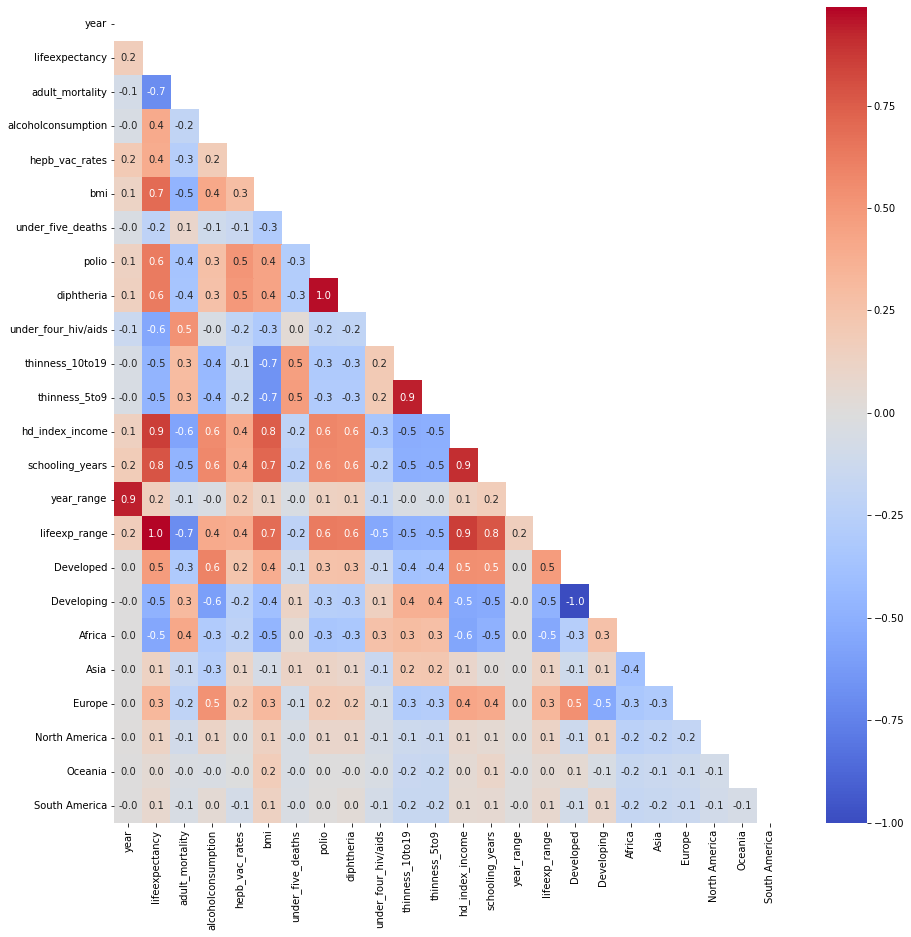

In [ ]:
# heatmap
plt.figure(figsize = (15,15))
mask_triu = np.triu(np.ones_like(data.corr(), dtype = bool))
_ = sns.heatmap(data.corr(), mask = mask_triu,
                cmap = 'coolwarm',
                annot = True, fmt = ',.1f', )

기대수명은 그 해의 0세 아이들이 생존할 것으로 예상되는 수명을 의미함. <br>
이에 영향을 미치는 변수로는 개인의 건강상태 외에도 국가적인 보건 인프라가 있음. <br>
위 히트맵 그래프를 통해, 본 데이터에서 최종적으로 예측하고자 하는 기대수명과 높은 상관관계를 갖는 feature를 선정했음.
<br>1. 개인의 건강 상태 : bmi(0.7) / polio, diphtheria(0.6) / thinness_10to19, thinness_5to9(-0.5)
<br>2. 개인 습관 : alcoholconsumption(0.4)
<br>3. 국가 상황 : nationstatus(Developed/Developing)(0.5) - 유럽(0.3) / 아프리카(-0.5)/ hd_index_income(0.7) 
<br>4. 국가 보건 인프라 : schooling_years(0.8) / adult_mortality(-0.7) / hepb_vac_rates(0.4) / under_four_hiv/aids(0.6)

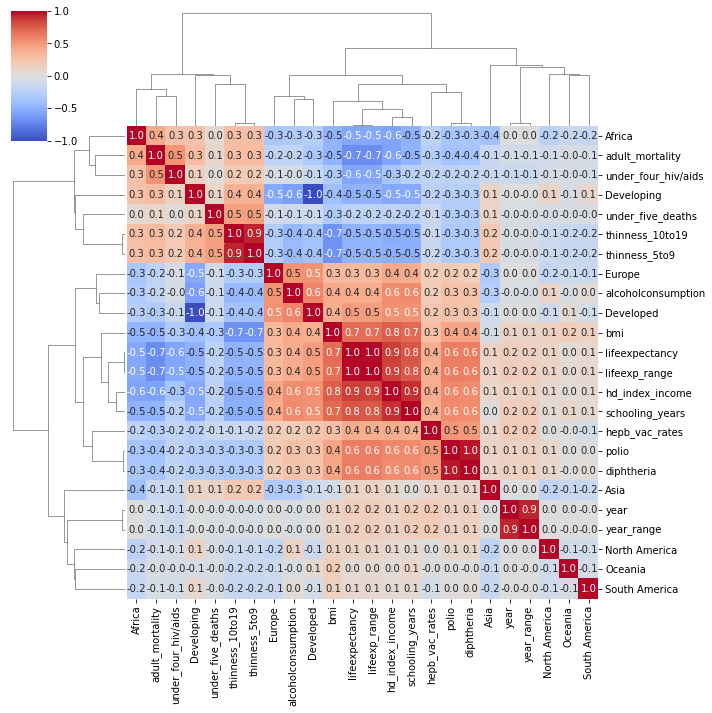

In [ ]:
# clustermap : heatmap처럼 상관 관계를 색깔로 나타내며, 행열 별로 비슷한 항목들을 묶어줌
_ = sns.clustermap(data = data.corr(),
                   annot = True, fmt = ',.1f',
                   cmap = 'coolwarm', 
                   vmin = -1, vmax = 1)

아래 국가 상태에 따른, 기대수명 추이에 관한 산점도와 기술통계를 보면, <br>
1. 기대수명과 선진국/개발도상국 구분은 의미가 있음
2. 근데 개발도상국의 경우 (gdp를 제외한 모든 feature(사망률/gdp/교육수준)에서 선진국 대비 표준편차가 큼 <br>
따라서 대륙 구분 등 개발도상국 내에서 클래스를 나누는 게 필요할 것 같음

In [ ]:
# nationstatus 구분에 따라 명확한 차이가 있는지 알아보기 위해, Developed = 0, Developing = 1 로 임시 파생변수 만들어줌
data['nationstatus_temp'] = data['Developed']*0 + data['Developing']

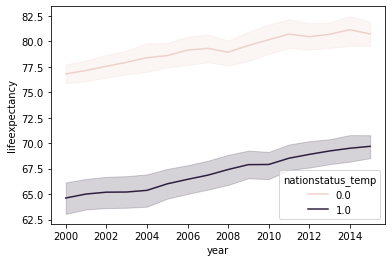

In [ ]:
# 0 - 선진국 / 1 - 개발도상국 - nationstatus 구분에 따라 기대수명에 명확한 차이가 존재
_ = sns.lineplot(data = data, x = 'year', y = 'lifeexpectancy',hue = 'nationstatus_temp' )

In [ ]:
data.groupby(by = 'nationstatus_temp', as_index = False)[['lifeexpectancy']].describe().rename({0:'Developed', 1:'Developing'}).T

Developed  Developing
lifeexpectancy count  512.00000  2416.00000
               mean    79.19785    67.11147
               std      3.93094     9.00609
               min     69.90000    36.30000
               25%     76.80000    61.10000
               50%     79.25000    69.00000
               75%     81.70000    74.00000
               max     89.00000    89.00000

성인 사망률과 기대수명은 눈에 띄는 음의 상관관계를 가짐<br>
이 때, 개발도상국/선진국 할 것 없이 회귀선이 크게 두 개로 나누어지는 걸 볼 수 있음<br>
회귀선1, 회귀선2를 이루는 데이터 간에는 무슨 차이가 있는지 알아보자

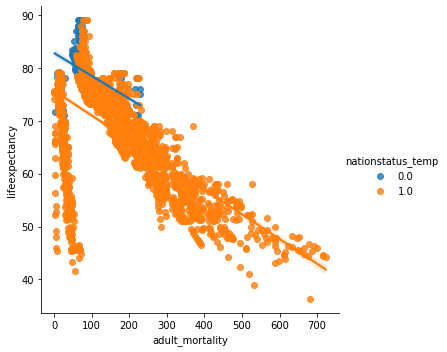

In [ ]:
_ = sns.lmplot(data = data, x= 'adult_mortality', y = 'lifeexpectancy', hue = 'nationstatus_temp')

In [ ]:
# lifeexpectancy = 60 기준, 데이터 살펴보기
df_under60 = data[(data['lifeexpectancy'] <= 60) ]
df_over60 = data[(data['lifeexpectancy'] > 60) ]
df_under60.shape, df_over60.shape

((594, 28), (2334, 28))

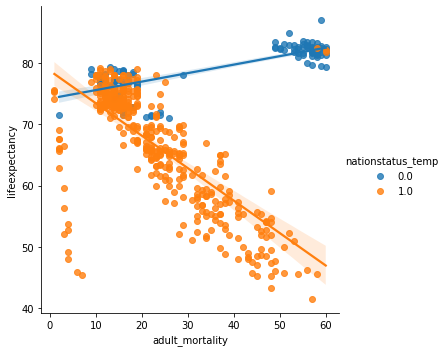

In [ ]:
_ = sns.lmplot(data = data[ (data['adult_mortality']<=60) ], 
               x= 'adult_mortality', y = 'lifeexpectancy', hue = 'nationstatus_temp')

In [ ]:
data.loc[ (data['adult_mortality']<=60), 'adult_mor_class'] = int(1)
data['adult_mor_class'] = data['adult_mor_class'].fillna(2).astype(int)
data['adult_mor_class'].value_counts()

2    2416
1     522
Name: adult_mor_class, dtype: int64

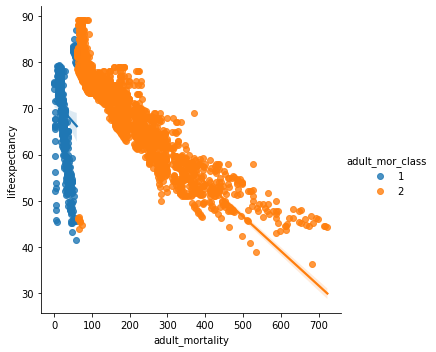

In [ ]:
_ = sns.lmplot(data = data, x= 'adult_mortality', y = 'lifeexpectancy', hue = 'adult_mor_class')

In [ ]:
data.groupby('adult_mor_class', as_index = False).mean().T

0          1
adult_mor_class        1.00000    2.00000
year                2007.50575 2007.49875
lifeexpectancy        69.26533   69.21617
adult_mortality       26.09770  196.55652
alcoholconsumption     4.52233    4.63606
hepb_vac_rates        92.27628   92.19406
bmi                   42.89735   41.38856
under_five_deaths     53.32759   39.76060
polio                 85.22605   86.67498
diphtheria            84.71839   86.33042
under_four_hiv/aids    1.63448    1.77228
thinness_10to19        4.70537    4.90277
thinness_5to9          4.68370    4.96708
hd_index_income        0.65563    0.65122
schooling_years       12.09906   12.07820
year_range             2.07280    2.06027
lifeexp_range          6.32375    6.27099
Developed              0.21839    0.16542
Developing             0.78161    0.83458
Africa                 0.27011    0.29925
Asia                   0.23180    0.26118
Europe                 0.25670    0.20281
North America          0.13602    0.10969
Oceania                0.04598    0.05629
South America          0.05747    0.06705
nationstatus_temp      0.78161    0.83458

주요 지표를 살펴본 결과, 눈에 띄는 차이는 데이터에 유럽 비율과 under_five_deaths이 높다는 것.<BR>
따라서 기대수명에 가장 큰 영향을 미치는 feature는 adult_mortality이며<br>
간접적으로 성인 사망자 수에 영향을 미치는 under_five_deaths / Europe / Developed 역시 상관계수에 관계없이 중요한 feature라고 판단함

###### 성인 사망률 - 기대수명 : 두 개의 회귀선으로 나누어지는 경향이 보임<br>
그래서 adult_mor_class에 따라, 다른 feature들이 다른 경향을 가지는지, 위 기술통계 내용을 한 눈에 보려 산점도를 그려 봄<br>
결론 = class 1, 2에 관계없이 다른 feature는 대체로 비슷한 경향을 보임


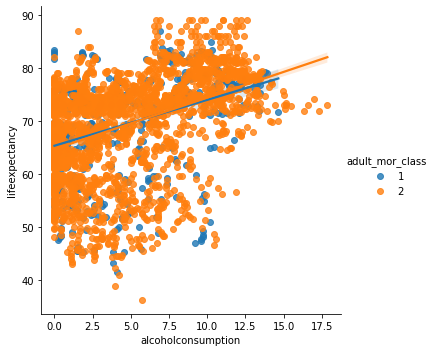

In [ ]:
_ = sns.lmplot(data = data, x= 'alcoholconsumption', y = 'lifeexpectancy', hue = 'adult_mor_class')

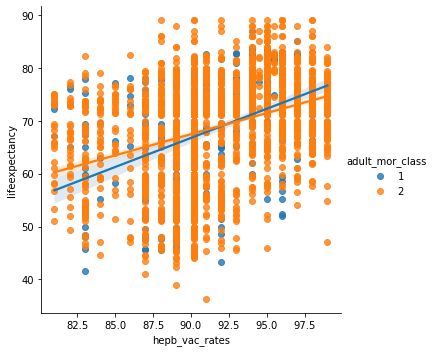

In [ ]:
_ = sns.lmplot(data = data, x= 'hepb_vac_rates', y = 'lifeexpectancy', hue = 'adult_mor_class')

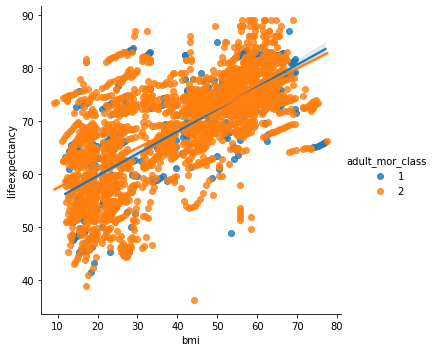

In [ ]:
_ = sns.lmplot(data = data, x= 'bmi', y = 'lifeexpectancy', hue = 'adult_mor_class')

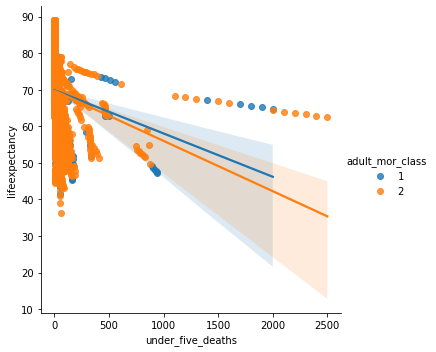

In [ ]:
_ = sns.lmplot(data = data, x= 'under_five_deaths', y = 'lifeexpectancy', hue = 'adult_mor_class')

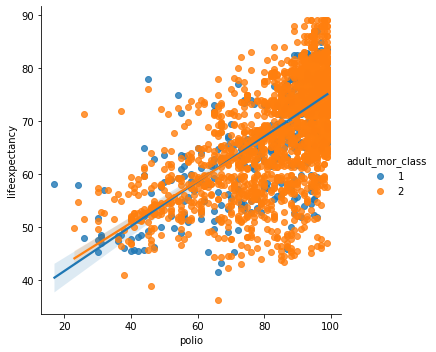

In [ ]:
_ = sns.lmplot(data = data, x= 'polio', y = 'lifeexpectancy', hue = 'adult_mor_class')

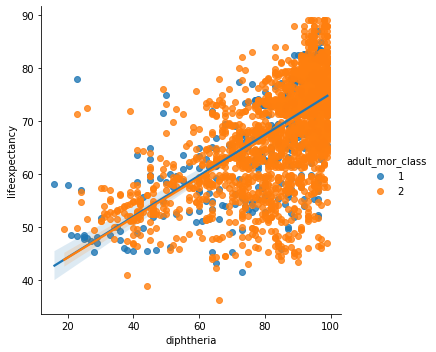

In [ ]:
_ = sns.lmplot(data = data, x= 'diphtheria', y = 'lifeexpectancy', hue = 'adult_mor_class')

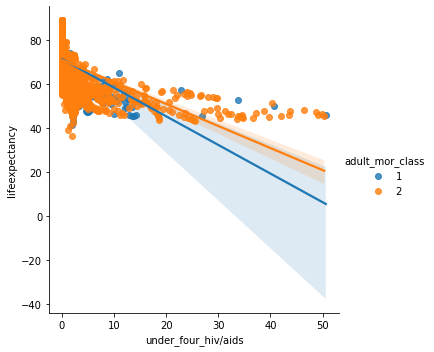

In [ ]:
_ = sns.lmplot(data = data, x= 'under_four_hiv/aids', y = 'lifeexpectancy', hue = 'adult_mor_class')

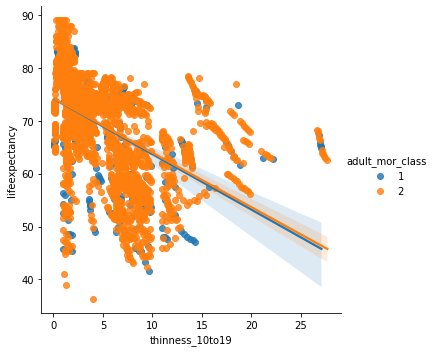

In [ ]:
_ = sns.lmplot(data = data, x= 'thinness_10to19', y = 'lifeexpectancy', hue = 'adult_mor_class')

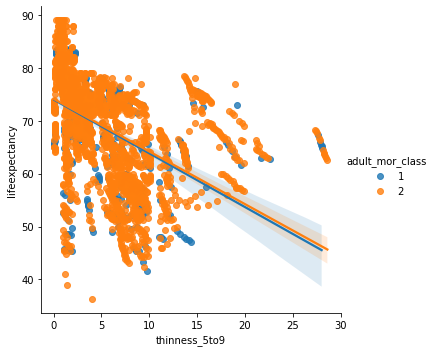

In [ ]:
_ = sns.lmplot(data = data, x= 'thinness_5to9', y = 'lifeexpectancy', hue = 'adult_mor_class')

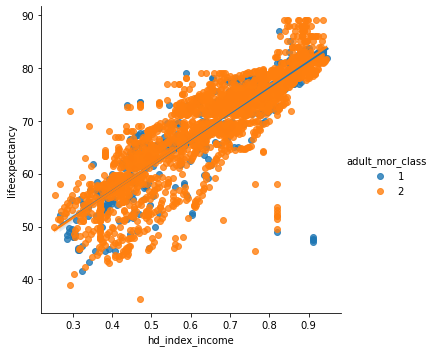

In [ ]:
_ = sns.lmplot(data = data, x= 'hd_index_income', y = 'lifeexpectancy', hue = 'adult_mor_class')

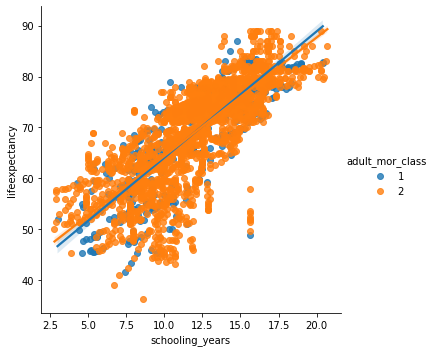

In [ ]:
_ = sns.lmplot(data = data, x= 'schooling_years', y = 'lifeexpectancy', hue = 'adult_mor_class')

# 5. Train/Test 데이터 만들기

In [ ]:
data.shape
# 왜 10개가 늘어났지?

(2938, 29)

In [ ]:
data.isnull().sum()

year                        10
lifeexpectancy              10
adult_mortality             10
alcoholconsumption          10
hepb_vac_rates              10
bmi                         10
under_five_deaths           10
polio                       10
diphtheria                  10
under_four_hiv/aids         10
thinness_10to19             10
thinness_5to9               10
hd_index_income             10
schooling_years             10
year_range                  10
lifeexp_range               10
adult_mor_over100           10
adult_between_10_and_100    10
adult_under10               10
Developed                   10
Developing                  10
Africa                       0
Asia                         0
Europe                       0
North America                0
Oceania                      0
South America                0
nationstatus_temp           10
adult_mor_class              0
dtype: int64

In [ ]:
data = data.dropna(how = 'any')
data.isnull().sum()

year                        0
lifeexpectancy              0
adult_mortality             0
alcoholconsumption          0
hepb_vac_rates              0
bmi                         0
under_five_deaths           0
polio                       0
diphtheria                  0
under_four_hiv/aids         0
thinness_10to19             0
thinness_5to9               0
hd_index_income             0
schooling_years             0
year_range                  0
lifeexp_range               0
adult_mor_over100           0
adult_between_10_and_100    0
adult_under10               0
Developed                   0
Developing                  0
Africa                      0
Asia                        0
Europe                      0
North America               0
Oceania                     0
South America               0
nationstatus_temp           0
adult_mor_class             0
dtype: int64

In [ ]:
data.to_csv('WK26_W7_Mini_project_Life_expectancy_Regression_ML_modeling_rawdata.csv', index = False)

In [ ]:
pd.read_csv('/content/WK26_W7_Mini_project_Life_expectancy_Regression_ML_modeling_rawdata.csv').shape

(2928, 29)

#  6. 머신러닝 알고리즘 불러오기 - part2에서
우리가 수업 시간에 배운 CART 계열 Random Forest랑, <br>
아래 알고리즘 시트 기준 가장 적합하다 판단되는 Lasso linear model 두 가지 돌려서 비교해줄 것임

모델 선택
<img src = 'https://scikit-learn.org/stable/_static/ml_map.png'>
[그림 출처 - Scikit-learn.org](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)